In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
workpath = '/content/drive/MyDrive/MaestriaIA/Tesis'
datasetpath = workpath + "/dataset_eggs"

**Extracci√≥n de im√°genes en v√≠deo**

In [ ]:
import os
path_image = datasetpath + "/dataset_eggs_3"
if not os.path.exists(path_image):
    os.makedirs(path_image)
    print(f"Carpeta creada: {path_image}")
else:
    print(f"La carpeta ya existe: {path_image}")
# **1. EXTRACCI√ìN DE IMAGEN EN V√çDEO**
!ffmpeg -i "{workpath}/source_video/video_huevos_3.mp4" -start_number 1057 -vf "fps=1" "{workpath}/dataset/dataset_eggs_3/eggs_%04d.jpg"

La carpeta ya existe: /content/drive/MyDrive/MaestriaIA/Tesis/dataset/dataset_eggs_3
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libthe

In [ ]:
import shutil

# Definir la ruta de la carpeta donde est√°n las im√°genes
dataset_path = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset/dataset_eggs_3"
zip_path = "/content/dataset_eggs_3.zip"

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', dataset_path)

print(f"Archivo comprimido en: {zip_path}")


Archivo comprimido en: /content/dataset_eggs_3.zip


**Lectura de im√°genes en las carpetas**

# **GROUNDED DINO + SAM2**

In [ ]:
!rm -rf /content/Grounded-SAM-2

In [ ]:
!mkdir /content/Grounded-SAM2
%cd /content/Grounded-SAM2
!git clone https://github.com/facebookresearch/segment-anything-2.git

/content/Grounded-SAM2
Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (376/376), done.


In [ ]:
%cd /content/Grounded-SAM2/segment-anything-2
!python setup.py install

/content/Grounded-SAM2/segment-anything-2
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
       

In [ ]:
%cd /content/Grounded-SAM2/segment-anything-2/checkpoints
!./download_ckpts.sh

/content/Grounded-SAM2/segment-anything-2/checkpoints
--2025-02-01 21:50:07--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‚Äòsam2.1_hiera_tiny.pt‚Äô

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   339MB/s    in 0.4s    

2025-02-01 21:50:08 (339 MB/s) - ‚Äòsam2.1_hiera_tiny.pt‚Äô saved [156008466/156008466]

--2025-02-01 21:50:08--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connec

In [ ]:
%cd /content/
!git clone https://github.com/IDEA-Research/GroundingDINO.git

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 463 (delta 176), reused 137 (delta 137), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [ ]:
%cd /content/GroundingDINO/
!pip install -r requirements.txt

/content/GroundingDINO
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-pack

In [ ]:
!pip install -e .

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cufft_cu12-

In [ ]:
import groundingdino
print("GroundingDINO importado con √©xito.")

GroundingDINO importado con √©xito.


In [ ]:
!mkdir checkpoints
%cd checkpoints
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/GroundingDINO/checkpoints


In [ ]:
!pip install hydra-core --force-reinstall

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cufft_cu12-

#Extraer todas las imagenes huevo

**Generaremos etiquetas**

In [ ]:
import os
import cv2
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from torchvision.ops import box_convert
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from GroundingDINO.groundingdino.util.inference import load_model, load_image, predict
from sklearn.ensemble import IsolationForest

# üîπ Configuraci√≥n de par√°metros
TEXT_PROMPT = "egg"
DATASET_DIR = Path("/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs")
SAM2_CHECKPOINT = "/content/Grounded-SAM2/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
SAM2_MODEL_CONFIG = "configs/sam2.1/sam2.1_hiera_l.yaml"
GROUNDING_DINO_CONFIG = "/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GROUNDING_DINO_CHECKPOINT = "/content/GroundingDINO/checkpoints/groundingdino_swint_ogc.pth"
BOX_THRESHOLD = 0.1
TEXT_THRESHOLD = 0.05
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# üîπ Directorios de salida
BASE_OUTPUT_DIR = Path("/content/dataset_huevos/")
IMAGES_DIR = BASE_OUTPUT_DIR / "images"
LABELS_DIR = BASE_OUTPUT_DIR / "labels"
STATS_DIR = BASE_OUTPUT_DIR / "stats"
IMAGES_DIR.mkdir(parents=True, exist_ok=True)
LABELS_DIR.mkdir(parents=True, exist_ok=True)
STATS_DIR.mkdir(parents=True, exist_ok=True)

# üîπ Cargar modelos
sam2_model = build_sam2(SAM2_MODEL_CONFIG, SAM2_CHECKPOINT, device=DEVICE)
sam2_predictor = SAM2ImagePredictor(sam2_model)
grounding_model = load_model(GROUNDING_DINO_CONFIG, GROUNDING_DINO_CHECKPOINT)
grounding_model.to(DEVICE)  # Evita advertencias moviendo el modelo manualmente

# üîπ Recorrer todas las im√°genes en el dataset
image_files = list(DATASET_DIR.glob("*.jpg"))
stats_data = []

for IMG_PATH in image_files:
    print(f"üìå Procesando imagen: {IMG_PATH.name}")
    start_time = time.time()

    # üîπ Cargar imagen
    img = cv2.imread(str(IMG_PATH))
    if img is None:
        print(f"‚ö†Ô∏è Advertencia: No se pudo cargar {IMG_PATH}, omitiendo...")
        continue

    h, w, _ = img.shape

    # üîπ Detecci√≥n con GroundingDINO
    image_source, image = load_image(str(IMG_PATH))
    sam2_predictor.set_image(image_source)
    boxes, confidences, labels = predict(grounding_model, image, TEXT_PROMPT, BOX_THRESHOLD, TEXT_THRESHOLD)

    # üîπ Escalar bounding boxes asegurando que est√©n en el mismo dispositivo
    boxes = boxes.to(DEVICE) * torch.tensor([w, h, w, h], device=DEVICE)
    input_boxes = box_convert(boxes, in_fmt="cxcywh", out_fmt="xyxy").cpu().numpy()

    # üîπ Aplicar Isolation Forest para eliminar anomal√≠as en detecciones
    if len(input_boxes) > 1:
        clf = IsolationForest(contamination=0.1, random_state=42)
        anomalies = clf.fit_predict(input_boxes)
        valid_boxes = input_boxes[anomalies == 1]
    else:
        valid_boxes = input_boxes

    num_detected_eggs = len(input_boxes)
    num_segmented_eggs = len(valid_boxes)
    sizes = [((box[2] - box[0]), (box[3] - box[1])) for box in valid_boxes]

    # üîπ Segmentaci√≥n con SAM2 y generaci√≥n de etiquetas YOLO
    labels_txt = []
    for box in valid_boxes:
        x1, y1, x2, y2 = map(int, box)

        center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
        point_coords = torch.tensor([[center_x, center_y]], dtype=torch.float32, device=DEVICE)

        masks, _, _ = sam2_predictor.predict(
            point_coords=point_coords,
            point_labels=torch.tensor([1], dtype=torch.int, device=DEVICE),
            multimask_output=False
        )

        if masks is None or len(masks) == 0:
            continue

        # üîπ Obtener contornos de la m√°scara segmentada
        mask_np = masks[0].astype(np.uint8)
        contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            continue

        # üîπ Convertir contorno a formato YOLO (normalizado)
        largest_contour = max(contours, key=cv2.contourArea)
        yolo_contour = [(x[0][0] / w, x[0][1] / h) for x in largest_contour]
        label_line = "0 " + " ".join([f"{x:.6f} {y:.6f}" for x, y in yolo_contour])
        labels_txt.append(label_line)

    # üîπ Guardar etiquetas YOLO
    image_name = IMG_PATH.stem
    label_path = LABELS_DIR / f"{image_name}.txt"
    with open(label_path, "w") as f:
        for line in labels_txt:
            f.write(line + "\n")

    # üîπ Guardar imagen sin contornos en im√°genes procesadas
    segmented_img_path = IMAGES_DIR / f"{image_name}.jpg"
    cv2.imwrite(str(segmented_img_path), img)

    # üîπ Guardar datos estad√≠sticos
    end_time = time.time()
    processing_time = end_time - start_time
    avg_width, avg_height = np.mean(sizes, axis=0) if sizes else (0, 0)
    segmentation_diff = num_detected_eggs - num_segmented_eggs

    stats_data.append([
        IMG_PATH.name,
        num_detected_eggs,
        num_segmented_eggs,
        avg_width,
        avg_height,
        processing_time,
        segmentation_diff
    ])

# üîπ Crear DataFrame con estad√≠sticas
df_stats = pd.DataFrame(stats_data, columns=[
    "Imagen",
    "Huevos Detectados",
    "Huevos Segmentados",
    "Ancho Promedio",
    "Alto Promedio",
    "Tiempo de Procesamiento",
    "Diferencia Detecci√≥n-Segmentaci√≥n"
])

# üîπ Guardar CSV con estad√≠sticas
df_stats.to_csv(STATS_DIR / "estadisticas_huevos.csv", index=False)

print("üéâ Procesamiento finalizado. Datos estad√≠sticos, etiquetas YOLO y gr√°ficos generados.")


final text_encoder_type: bert-base-uncased


üìå Procesando imagen: eggs_1116.jpg


üìå Procesando imagen: eggs_1119.jpg


üìå Procesando imagen: eggs_1118.jpg


üìå Procesando imagen: eggs_1117.jpg


üìå Procesando imagen: eggs_1120.jpg


üìå Procesando imagen: eggs_1121.jpg


üìå Procesando imagen: eggs_1122.jpg


üìå Procesando imagen: eggs_1125.jpg


üìå Procesando imagen: eggs_1123.jpg


üìå Procesando imagen: eggs_1124.jpg


üìå Procesando imagen: eggs_1126.jpg


üìå Procesando imagen: eggs_1127.jpg


üìå Procesando imagen: eggs_1128.jpg


üìå Procesando imagen: eggs_1129.jpg


üìå Procesando imagen: eggs_1131.jpg


üìå Procesando imagen: eggs_1132.jpg


üìå Procesando imagen: eggs_1130.jpg


üìå Procesando imagen: eggs_1135.jpg


üìå Procesando imagen: eggs_1134.jpg


üìå Procesando imagen: eggs_1133.jpg


üìå Procesando imagen: eggs_1136.jpg


üìå Procesando imagen: eggs_1137.jpg


üìå Procesando imagen: eggs_1138.jpg


üìå Procesando imagen: eggs_1141.jpg


üìå Procesando imagen: eggs_1139.jpg


üìå Procesando imagen: eggs_1140.jpg


üìå Procesando imagen: eggs_1142.jpg


üìå Procesando imagen: eggs_1143.jpg


üìå Procesando imagen: eggs_1144.jpg


üìå Procesando imagen: eggs_1146.jpg


üìå Procesando imagen: eggs_1145.jpg


üìå Procesando imagen: eggs_1147.jpg


üìå Procesando imagen: eggs_1149.jpg


üìå Procesando imagen: eggs_1148.jpg


üìå Procesando imagen: eggs_1151.jpg


üìå Procesando imagen: eggs_1150.jpg


üìå Procesando imagen: eggs_1152.jpg


üìå Procesando imagen: eggs_1154.jpg


üìå Procesando imagen: eggs_1153.jpg


üìå Procesando imagen: eggs_1155.jpg


üìå Procesando imagen: eggs_1157.jpg


üìå Procesando imagen: eggs_1156.jpg


üìå Procesando imagen: eggs_1159.jpg


üìå Procesando imagen: eggs_1158.jpg


üìå Procesando imagen: eggs_1160.jpg


üìå Procesando imagen: eggs_1162.jpg


üìå Procesando imagen: eggs_1161.jpg


üìå Procesando imagen: eggs_1163.jpg


üìå Procesando imagen: eggs_1166.jpg


üìå Procesando imagen: eggs_1164.jpg


üìå Procesando imagen: eggs_1165.jpg


üìå Procesando imagen: eggs_1167.jpg


üìå Procesando imagen: eggs_1169.jpg


üìå Procesando imagen: eggs_1168.jpg


üìå Procesando imagen: eggs_1170.jpg


üìå Procesando imagen: eggs_1172.jpg


üìå Procesando imagen: eggs_1173.jpg


üìå Procesando imagen: eggs_1171.jpg


üìå Procesando imagen: eggs_1175.jpg


üìå Procesando imagen: eggs_1174.jpg


üìå Procesando imagen: eggs_1176.jpg


üìå Procesando imagen: eggs_1178.jpg


üìå Procesando imagen: eggs_1177.jpg


üìå Procesando imagen: eggs_1180.jpg


üìå Procesando imagen: eggs_1181.jpg


üìå Procesando imagen: eggs_1179.jpg


üìå Procesando imagen: eggs_1182.jpg


üìå Procesando imagen: eggs_1184.jpg


üìå Procesando imagen: eggs_1183.jpg


üìå Procesando imagen: eggs_1186.jpg


üìå Procesando imagen: eggs_1185.jpg


üìå Procesando imagen: eggs_1187.jpg


üìå Procesando imagen: eggs_1188.jpg


üìå Procesando imagen: eggs_1191.jpg


üìå Procesando imagen: eggs_1190.jpg


üìå Procesando imagen: eggs_1189.jpg


üìå Procesando imagen: eggs_1192.jpg


üìå Procesando imagen: eggs_1193.jpg


üìå Procesando imagen: eggs_1194.jpg


üìå Procesando imagen: eggs_1196.jpg


üìå Procesando imagen: eggs_1195.jpg


üìå Procesando imagen: eggs_1197.jpg


üìå Procesando imagen: eggs_1200.jpg


üìå Procesando imagen: eggs_1201.jpg


üìå Procesando imagen: eggs_1198.jpg


üìå Procesando imagen: eggs_1199.jpg


üìå Procesando imagen: eggs_1202.jpg


üìå Procesando imagen: eggs_1203.jpg


üìå Procesando imagen: eggs_1204.jpg


üìå Procesando imagen: eggs_1205.jpg


üìå Procesando imagen: eggs_1206.jpg


üìå Procesando imagen: eggs_1207.jpg


üìå Procesando imagen: eggs_1208.jpg


üìå Procesando imagen: eggs_1211.jpg


üìå Procesando imagen: eggs_1209.jpg


üìå Procesando imagen: eggs_1210.jpg


üìå Procesando imagen: eggs_1213.jpg


üìå Procesando imagen: eggs_1212.jpg


üìå Procesando imagen: eggs_1214.jpg


üìå Procesando imagen: eggs_1217.jpg


üìå Procesando imagen: eggs_1215.jpg


üìå Procesando imagen: eggs_1216.jpg


üìå Procesando imagen: eggs_1218.jpg


üìå Procesando imagen: eggs_1219.jpg


üìå Procesando imagen: eggs_1220.jpg


üìå Procesando imagen: eggs_1222.jpg


üìå Procesando imagen: eggs_1223.jpg


üìå Procesando imagen: eggs_1221.jpg


üìå Procesando imagen: eggs_1224.jpg


üìå Procesando imagen: eggs_1225.jpg


üìå Procesando imagen: eggs_1227.jpg


üìå Procesando imagen: eggs_1226.jpg


üìå Procesando imagen: eggs_1228 (1).jpg


üìå Procesando imagen: eggs_1229 (1).jpg


üìå Procesando imagen: eggs_1230.jpg


üìå Procesando imagen: eggs_1229.jpg


üìå Procesando imagen: eggs_1228.jpg


üìå Procesando imagen: eggs_1232.jpg


üìå Procesando imagen: eggs_1231.jpg


üìå Procesando imagen: eggs_1233.jpg


üìå Procesando imagen: eggs_1236.jpg


üìå Procesando imagen: eggs_1235.jpg


üìå Procesando imagen: eggs_1234.jpg


üìå Procesando imagen: eggs_1237.jpg


üìå Procesando imagen: eggs_1238.jpg


üìå Procesando imagen: eggs_1241.jpg


üìå Procesando imagen: eggs_1239.jpg


üìå Procesando imagen: eggs_1240.jpg


üìå Procesando imagen: eggs_1242.jpg


üìå Procesando imagen: eggs_1243.jpg


üìå Procesando imagen: eggs_1244.jpg


üìå Procesando imagen: eggs_1245.jpg


üìå Procesando imagen: eggs_1246.jpg


üìå Procesando imagen: eggs_1247.jpg


üìå Procesando imagen: eggs_1248.jpg


üìå Procesando imagen: eggs_1250.jpg


üìå Procesando imagen: eggs_1251.jpg


üìå Procesando imagen: eggs_1249.jpg


üìå Procesando imagen: eggs_1253.jpg


üìå Procesando imagen: eggs_1254.jpg


üìå Procesando imagen: eggs_1252.jpg


üìå Procesando imagen: eggs_1257.jpg


üìå Procesando imagen: eggs_1256.jpg


üìå Procesando imagen: eggs_1255.jpg


üìå Procesando imagen: eggs_1259.jpg


üìå Procesando imagen: eggs_1260.jpg


üìå Procesando imagen: eggs_1258.jpg


üìå Procesando imagen: eggs_1261.jpg


üìå Procesando imagen: eggs_1262.jpg


üìå Procesando imagen: eggs_1264.jpg


üìå Procesando imagen: eggs_1263.jpg


üìå Procesando imagen: eggs_1266.jpg


üìå Procesando imagen: eggs_1267.jpg


üìå Procesando imagen: eggs_1265.jpg


üìå Procesando imagen: eggs_1268.jpg


üìå Procesando imagen: eggs_1270.jpg


üìå Procesando imagen: eggs_1269.jpg


üìå Procesando imagen: eggs_1271.jpg


üìå Procesando imagen: eggs_1272.jpg


üìå Procesando imagen: eggs_1273.jpg


üìå Procesando imagen: eggs_1274.jpg


üìå Procesando imagen: eggs_1275.jpg


üìå Procesando imagen: eggs_1277.jpg


üìå Procesando imagen: eggs_1276.jpg


üìå Procesando imagen: eggs_1278.jpg


üìå Procesando imagen: eggs_1280.jpg


üìå Procesando imagen: eggs_1279.jpg


üìå Procesando imagen: eggs_1281.jpg


üìå Procesando imagen: eggs_1282.jpg


üìå Procesando imagen: eggs_1284.jpg


üìå Procesando imagen: eggs_1283.jpg


üìå Procesando imagen: eggs_1286.jpg


üìå Procesando imagen: eggs_1285.jpg


üìå Procesando imagen: eggs_1289.jpg


üìå Procesando imagen: eggs_1288.jpg


üìå Procesando imagen: eggs_1290.jpg


üìå Procesando imagen: eggs_1287.jpg


üìå Procesando imagen: eggs_1294.jpg


üìå Procesando imagen: eggs_1292.jpg


üìå Procesando imagen: eggs_1291.jpg


üìå Procesando imagen: eggs_1293.jpg


üìå Procesando imagen: eggs_1296.jpg


üìå Procesando imagen: eggs_1298.jpg


üìå Procesando imagen: eggs_1295.jpg


üìå Procesando imagen: eggs_1299.jpg


üìå Procesando imagen: eggs_1297.jpg


üìå Procesando imagen: eggs_1300.jpg


üìå Procesando imagen: eggs_1301.jpg


üìå Procesando imagen: eggs_1303.jpg


üìå Procesando imagen: eggs_1304.jpg


üìå Procesando imagen: eggs_1302.jpg


üìå Procesando imagen: eggs_1305.jpg


üìå Procesando imagen: eggs_1307.jpg


üìå Procesando imagen: eggs_1306.jpg


üìå Procesando imagen: eggs_1312.jpg


üìå Procesando imagen: eggs_1309.jpg


üìå Procesando imagen: eggs_1311.jpg


üìå Procesando imagen: eggs_1308.jpg


üìå Procesando imagen: eggs_1310.jpg


üìå Procesando imagen: eggs_1315.jpg


üìå Procesando imagen: eggs_1316.jpg


üìå Procesando imagen: eggs_1314.jpg


üìå Procesando imagen: eggs_1313.jpg


üìå Procesando imagen: eggs_1317.jpg


üìå Procesando imagen: eggs_1322.jpg


üìå Procesando imagen: eggs_1318.jpg


üìå Procesando imagen: eggs_1320.jpg


üìå Procesando imagen: eggs_1321.jpg


üìå Procesando imagen: eggs_1319.jpg


üìå Procesando imagen: eggs_1324.jpg


üìå Procesando imagen: eggs_1325.jpg


üìå Procesando imagen: eggs_1327.jpg


üìå Procesando imagen: eggs_1323.jpg


üìå Procesando imagen: eggs_1326.jpg


üìå Procesando imagen: eggs_1328.jpg


üìå Procesando imagen: eggs_1329.jpg


üìå Procesando imagen: eggs_1332.jpg


üìå Procesando imagen: eggs_1331.jpg


üìå Procesando imagen: eggs_1330.jpg


üìå Procesando imagen: eggs_1333.jpg


üìå Procesando imagen: eggs_1334.jpg


üìå Procesando imagen: eggs_1335.jpg


üìå Procesando imagen: eggs_1338.jpg


üìå Procesando imagen: eggs_1337.jpg


üìå Procesando imagen: eggs_1336.jpg


üìå Procesando imagen: eggs_1341.jpg


üìå Procesando imagen: eggs_1340.jpg


üìå Procesando imagen: eggs_1339.jpg


üìå Procesando imagen: eggs_1342.jpg


üìå Procesando imagen: eggs_1344.jpg


üìå Procesando imagen: eggs_1343.jpg


üìå Procesando imagen: eggs_1345.jpg


üìå Procesando imagen: eggs_1347.jpg


üìå Procesando imagen: eggs_1346.jpg


üìå Procesando imagen: eggs_1349.jpg


üìå Procesando imagen: eggs_1348.jpg


üìå Procesando imagen: eggs_1351.jpg


üìå Procesando imagen: eggs_1352.jpg


üìå Procesando imagen: eggs_1350.jpg


üìå Procesando imagen: eggs_1357.jpg


üìå Procesando imagen: eggs_1354.jpg


üìå Procesando imagen: eggs_1353.jpg


üìå Procesando imagen: eggs_1356.jpg


üìå Procesando imagen: eggs_1355.jpg


üìå Procesando imagen: eggs_1358.jpg


üìå Procesando imagen: eggs_1361.jpg


üìå Procesando imagen: eggs_1362.jpg


üìå Procesando imagen: eggs_1359.jpg


üìå Procesando imagen: eggs_1360.jpg


üìå Procesando imagen: eggs_1366.jpg


üìå Procesando imagen: eggs_1364.jpg


üìå Procesando imagen: eggs_1367.jpg


üìå Procesando imagen: eggs_1365.jpg


üìå Procesando imagen: eggs_1363.jpg


üìå Procesando imagen: eggs_1370.jpg


üìå Procesando imagen: eggs_1369.jpg


üìå Procesando imagen: eggs_1368.jpg


üìå Procesando imagen: eggs_1373.jpg


üìå Procesando imagen: eggs_1372.jpg


üìå Procesando imagen: eggs_1371.jpg


üìå Procesando imagen: eggs_1377.jpg


üìå Procesando imagen: eggs_1376.jpg


üìå Procesando imagen: eggs_1374.jpg


üìå Procesando imagen: eggs_1375.jpg


üìå Procesando imagen: eggs_1378.jpg


üìå Procesando imagen: eggs_1381.jpg


üìå Procesando imagen: eggs_1382.jpg


üìå Procesando imagen: eggs_1383.jpg


üìå Procesando imagen: eggs_1380.jpg


üìå Procesando imagen: eggs_1379.jpg


üìå Procesando imagen: eggs_1384.jpg


üìå Procesando imagen: eggs_1386.jpg


üìå Procesando imagen: eggs_1385.jpg


üìå Procesando imagen: eggs_1388.jpg


üìå Procesando imagen: eggs_1387.jpg


üìå Procesando imagen: eggs_1390.jpg


üìå Procesando imagen: eggs_1392.jpg


üìå Procesando imagen: eggs_1389.jpg


üìå Procesando imagen: eggs_1391.jpg


üìå Procesando imagen: eggs_1394.jpg


üìå Procesando imagen: eggs_1393.jpg


üìå Procesando imagen: eggs_1395.jpg


üìå Procesando imagen: eggs_1396.jpg


üìå Procesando imagen: eggs_1397.jpg


üìå Procesando imagen: eggs_1401.jpg


üìå Procesando imagen: eggs_1399.jpg


üìå Procesando imagen: eggs_1398.jpg


üìå Procesando imagen: eggs_1400.jpg


üìå Procesando imagen: eggs_1403.jpg


üìå Procesando imagen: eggs_1404.jpg


üìå Procesando imagen: eggs_1402.jpg


üìå Procesando imagen: eggs_1407.jpg


üìå Procesando imagen: eggs_1406.jpg


üìå Procesando imagen: eggs_1405.jpg


üìå Procesando imagen: eggs_1409.jpg


üìå Procesando imagen: eggs_1408.jpg


üìå Procesando imagen: eggs_1412.jpg


üìå Procesando imagen: eggs_1410.jpg


üìå Procesando imagen: eggs_1411.jpg


üìå Procesando imagen: eggs_1413.jpg


üìå Procesando imagen: eggs_1417.jpg


üìå Procesando imagen: eggs_1418.jpg


üìå Procesando imagen: eggs_1414.jpg


üìå Procesando imagen: eggs_1416.jpg


üìå Procesando imagen: eggs_1415.jpg


üìå Procesando imagen: eggs_1422.jpg


üìå Procesando imagen: eggs_1421.jpg


üìå Procesando imagen: eggs_1419.jpg


üìå Procesando imagen: eggs_1423.jpg


üìå Procesando imagen: eggs_1420.jpg


üìå Procesando imagen: eggs_1426.jpg


üìå Procesando imagen: eggs_1424.jpg


üìå Procesando imagen: eggs_1427.jpg


üìå Procesando imagen: eggs_1428.jpg


üìå Procesando imagen: eggs_1425.jpg


üìå Procesando imagen: eggs_1429.jpg


üìå Procesando imagen: eggs_1431.jpg


üìå Procesando imagen: eggs_1432.jpg


üìå Procesando imagen: eggs_1430.jpg


üìå Procesando imagen: eggs_1433.jpg


üìå Procesando imagen: eggs_1435.jpg


üìå Procesando imagen: eggs_1434.jpg


üìå Procesando imagen: eggs_1436.jpg


üìå Procesando imagen: eggs_1437.jpg


üìå Procesando imagen: eggs_1438.jpg


üìå Procesando imagen: eggs_1439.jpg


üìå Procesando imagen: eggs_1443.jpg


üìå Procesando imagen: eggs_1442.jpg


üìå Procesando imagen: eggs_1440.jpg


üìå Procesando imagen: eggs_1441.jpg


üìå Procesando imagen: eggs_1444.jpg


üìå Procesando imagen: eggs_1445.jpg


üìå Procesando imagen: eggs_1446.jpg


üìå Procesando imagen: eggs_1448.jpg


üìå Procesando imagen: eggs_1447.jpg


üìå Procesando imagen: eggs_1449.jpg


üìå Procesando imagen: eggs_1451.jpg


üìå Procesando imagen: eggs_1450.jpg


üìå Procesando imagen: eggs_1453.jpg


üìå Procesando imagen: eggs_1452.jpg


üìå Procesando imagen: eggs_1454.jpg


üìå Procesando imagen: eggs_1455.jpg


üìå Procesando imagen: eggs_1457.jpg


üìå Procesando imagen: eggs_1458.jpg


üìå Procesando imagen: eggs_1459.jpg


üìå Procesando imagen: eggs_1456.jpg


üìå Procesando imagen: eggs_1463.jpg


üìå Procesando imagen: eggs_1461.jpg


üìå Procesando imagen: eggs_1462.jpg


üìå Procesando imagen: eggs_1460.jpg


üìå Procesando imagen: eggs_1464.jpg


üìå Procesando imagen: eggs_1468.jpg


üìå Procesando imagen: eggs_1467.jpg


üìå Procesando imagen: eggs_1465.jpg


üìå Procesando imagen: eggs_1466.jpg


üìå Procesando imagen: eggs_1469.jpg


üìå Procesando imagen: eggs_1471.jpg


üìå Procesando imagen: eggs_1470.jpg


üìå Procesando imagen: eggs_1473.jpg


üìå Procesando imagen: eggs_1474.jpg


üìå Procesando imagen: eggs_1472.jpg


üìå Procesando imagen: eggs_1475.jpg


üìå Procesando imagen: eggs_1476.jpg


üìå Procesando imagen: eggs_1478.jpg


üìå Procesando imagen: eggs_1477.jpg


üìå Procesando imagen: eggs_1479.jpg


üìå Procesando imagen: eggs_1481.jpg


üìå Procesando imagen: eggs_1483.jpg


üìå Procesando imagen: eggs_1484.jpg


üìå Procesando imagen: eggs_1480.jpg


üìå Procesando imagen: eggs_1482.jpg


üìå Procesando imagen: eggs_1485.jpg


üìå Procesando imagen: eggs_1489.jpg


üìå Procesando imagen: eggs_1487.jpg


üìå Procesando imagen: eggs_1488.jpg


üìå Procesando imagen: eggs_1486.jpg


üìå Procesando imagen: eggs_1493.jpg


üìå Procesando imagen: eggs_1492.jpg


üìå Procesando imagen: eggs_1491.jpg


üìå Procesando imagen: eggs_1494.jpg


üìå Procesando imagen: eggs_1490.jpg


üìå Procesando imagen: eggs_1496.jpg


üìå Procesando imagen: eggs_1497.jpg


üìå Procesando imagen: eggs_1499.jpg


üìå Procesando imagen: eggs_1495.jpg


üìå Procesando imagen: eggs_1498.jpg


üìå Procesando imagen: eggs_1503.jpg


üìå Procesando imagen: eggs_1501.jpg


üìå Procesando imagen: eggs_1500.jpg


üìå Procesando imagen: eggs_1502.jpg


üìå Procesando imagen: eggs_1506.jpg


üìå Procesando imagen: eggs_1505.jpg


üìå Procesando imagen: eggs_1504.jpg


üìå Procesando imagen: eggs_1509.jpg


üìå Procesando imagen: eggs_1508.jpg


üìå Procesando imagen: eggs_1507.jpg


üìå Procesando imagen: eggs_1514.jpg


üìå Procesando imagen: eggs_1510.jpg


üìå Procesando imagen: eggs_1513.jpg


üìå Procesando imagen: eggs_1512.jpg


üìå Procesando imagen: eggs_1511.jpg


üìå Procesando imagen: eggs_1517.jpg


üìå Procesando imagen: eggs_1516.jpg


üìå Procesando imagen: eggs_1518.jpg


üìå Procesando imagen: eggs_1519.jpg


üìå Procesando imagen: eggs_1515.jpg


üìå Procesando imagen: eggs_1524.jpg


üìå Procesando imagen: eggs_1523.jpg


üìå Procesando imagen: eggs_1525.jpg


üìå Procesando imagen: eggs_1522.jpg


üìå Procesando imagen: eggs_1520.jpg


üìå Procesando imagen: eggs_1521.jpg


üìå Procesando imagen: eggs_1529.jpg


üìå Procesando imagen: eggs_1528.jpg


üìå Procesando imagen: eggs_1526.jpg


üìå Procesando imagen: eggs_1527.jpg


üìå Procesando imagen: eggs_1530.jpg


üìå Procesando imagen: eggs_1532.jpg


üìå Procesando imagen: eggs_1533.jpg


üìå Procesando imagen: eggs_1531.jpg


üìå Procesando imagen: eggs_1534.jpg


üìå Procesando imagen: eggs_1537.jpg


üìå Procesando imagen: eggs_1535.jpg


üìå Procesando imagen: eggs_1536.jpg


üìå Procesando imagen: eggs_1539.jpg


üìå Procesando imagen: eggs_1541.jpg


üìå Procesando imagen: eggs_1540.jpg


üìå Procesando imagen: eggs_1538.jpg


üìå Procesando imagen: eggs_1545.jpg


üìå Procesando imagen: eggs_1543.jpg


üìå Procesando imagen: eggs_1544.jpg


üìå Procesando imagen: eggs_1542.jpg


üìå Procesando imagen: eggs_1547.jpg


üìå Procesando imagen: eggs_1546.jpg


üìå Procesando imagen: eggs_1550.jpg


üìå Procesando imagen: eggs_1548.jpg


üìå Procesando imagen: eggs_1549.jpg


üìå Procesando imagen: eggs_1553.jpg


üìå Procesando imagen: eggs_1551.jpg


üìå Procesando imagen: eggs_1555.jpg


üìå Procesando imagen: eggs_1554.jpg


üìå Procesando imagen: eggs_1552.jpg


üìå Procesando imagen: eggs_1557.jpg


üìå Procesando imagen: eggs_1558.jpg


üìå Procesando imagen: eggs_1556.jpg


üìå Procesando imagen: eggs_1559.jpg


üìå Procesando imagen: eggs_1560.jpg


üìå Procesando imagen: eggs_1561.jpg


üìå Procesando imagen: eggs_1565.jpg


üìå Procesando imagen: eggs_1563.jpg


üìå Procesando imagen: eggs_1562.jpg


üìå Procesando imagen: eggs_1564.jpg


üìå Procesando imagen: eggs_1568.jpg


üìå Procesando imagen: eggs_1566.jpg


üìå Procesando imagen: eggs_1569.jpg


üìå Procesando imagen: eggs_1567.jpg


üìå Procesando imagen: eggs_1571.jpg


üìå Procesando imagen: eggs_1570.jpg


üìå Procesando imagen: eggs_1572.jpg


üìå Procesando imagen: eggs_1573.jpg


üìå Procesando imagen: eggs_1575.jpg


üìå Procesando imagen: eggs_1574.jpg


üìå Procesando imagen: eggs_1577.jpg


üìå Procesando imagen: eggs_1578.jpg


üìå Procesando imagen: eggs_1579.jpg


üìå Procesando imagen: eggs_1580.jpg


üìå Procesando imagen: eggs_1576.jpg


üìå Procesando imagen: eggs_1582.jpg


üìå Procesando imagen: eggs_1581.jpg


üìå Procesando imagen: eggs_1585.jpg


üìå Procesando imagen: eggs_1584.jpg


üìå Procesando imagen: eggs_1583.jpg


üìå Procesando imagen: eggs_1591.jpg


üìå Procesando imagen: eggs_1590.jpg


üìå Procesando imagen: eggs_1586.jpg


üìå Procesando imagen: eggs_1587.jpg


üìå Procesando imagen: eggs_1588.jpg


üìå Procesando imagen: eggs_1589.jpg


üìå Procesando imagen: eggs_1592.jpg


üìå Procesando imagen: eggs_1596.jpg


üìå Procesando imagen: eggs_1593.jpg


üìå Procesando imagen: eggs_1594.jpg


üìå Procesando imagen: eggs_1595.jpg


üìå Procesando imagen: eggs_1599.jpg


üìå Procesando imagen: eggs_1598.jpg


üìå Procesando imagen: eggs_1600.jpg


üìå Procesando imagen: eggs_1597.jpg


üìå Procesando imagen: eggs_1601.jpg


üìå Procesando imagen: eggs_1603.jpg


üìå Procesando imagen: eggs_1602.jpg


üìå Procesando imagen: eggs_1604.jpg


üìå Procesando imagen: eggs_1605.jpg


üìå Procesando imagen: eggs_1606.jpg


üìå Procesando imagen: eggs_1608.jpg


üìå Procesando imagen: eggs_1609.jpg


üìå Procesando imagen: eggs_1610.jpg


üìå Procesando imagen: eggs_1607.jpg


üìå Procesando imagen: eggs_1615.jpg


üìå Procesando imagen: eggs_1616.jpg


üìå Procesando imagen: eggs_1613.jpg


üìå Procesando imagen: eggs_1611.jpg


üìå Procesando imagen: eggs_1614.jpg


üìå Procesando imagen: eggs_1612.jpg


üìå Procesando imagen: eggs_1617.jpg


üìå Procesando imagen: eggs_1619.jpg


üìå Procesando imagen: eggs_1618.jpg


üìå Procesando imagen: eggs_1620.jpg


üìå Procesando imagen: eggs_1621.jpg


üìå Procesando imagen: eggs_1622.jpg


üìå Procesando imagen: eggs_1623.jpg


üìå Procesando imagen: eggs_1624.jpg


üìå Procesando imagen: eggs_1625.jpg


üìå Procesando imagen: eggs_1628.jpg


üìå Procesando imagen: eggs_1626.jpg


üìå Procesando imagen: eggs_1627.jpg


üìå Procesando imagen: eggs_1631.jpg


üìå Procesando imagen: eggs_1630.jpg


üìå Procesando imagen: eggs_1629.jpg


üìå Procesando imagen: eggs_1633.jpg


üìå Procesando imagen: eggs_1634.jpg


üìå Procesando imagen: eggs_1632.jpg


üìå Procesando imagen: eggs_1635.jpg


üìå Procesando imagen: eggs_1639.jpg


üìå Procesando imagen: eggs_1640.jpg


üìå Procesando imagen: eggs_1637.jpg


üìå Procesando imagen: eggs_1636.jpg


üìå Procesando imagen: eggs_1638.jpg


üìå Procesando imagen: eggs_1645.jpg


üìå Procesando imagen: eggs_1641.jpg


üìå Procesando imagen: eggs_1643.jpg


üìå Procesando imagen: eggs_1642.jpg


üìå Procesando imagen: eggs_1644.jpg


üìå Procesando imagen: eggs_1649.jpg


üìå Procesando imagen: eggs_1646.jpg


üìå Procesando imagen: eggs_1648.jpg


üìå Procesando imagen: eggs_1647.jpg


üìå Procesando imagen: eggs_1650.jpg


üìå Procesando imagen: eggs_1655.jpg


üìå Procesando imagen: eggs_1653.jpg


üìå Procesando imagen: eggs_1652.jpg


üìå Procesando imagen: eggs_1651.jpg


üìå Procesando imagen: eggs_1654.jpg


üìå Procesando imagen: eggs_1657.jpg


üìå Procesando imagen: eggs_1658.jpg


üìå Procesando imagen: eggs_1659.jpg


üìå Procesando imagen: eggs_1660.jpg


üìå Procesando imagen: eggs_1656.jpg


üìå Procesando imagen: eggs_1663.jpg


üìå Procesando imagen: eggs_1661.jpg


üìå Procesando imagen: eggs_1662.jpg


üìå Procesando imagen: eggs_1664.jpg


üìå Procesando imagen: eggs_1666.jpg


üìå Procesando imagen: eggs_1665.jpg


üìå Procesando imagen: eggs_1668.jpg


üìå Procesando imagen: eggs_1670.jpg


üìå Procesando imagen: eggs_1667.jpg


üìå Procesando imagen: eggs_1669.jpg


üìå Procesando imagen: eggs_1672.jpg


üìå Procesando imagen: eggs_1671.jpg


üìå Procesando imagen: eggs_1674.jpg


üìå Procesando imagen: eggs_1675.jpg


üìå Procesando imagen: eggs_1673.jpg


üìå Procesando imagen: eggs_1676.jpg


üìå Procesando imagen: eggs_1679.jpg


üìå Procesando imagen: eggs_1680.jpg


üìå Procesando imagen: eggs_1678.jpg


üìå Procesando imagen: eggs_1677.jpg


üìå Procesando imagen: eggs_1684.jpg


üìå Procesando imagen: eggs_1685.jpg


üìå Procesando imagen: eggs_1683.jpg


üìå Procesando imagen: eggs_1682.jpg


üìå Procesando imagen: eggs_1681.jpg


üìå Procesando imagen: eggs_1689.jpg


üìå Procesando imagen: eggs_1690.jpg


üìå Procesando imagen: eggs_1686.jpg


üìå Procesando imagen: eggs_1687.jpg


üìå Procesando imagen: eggs_1688.jpg


üìå Procesando imagen: eggs_1695.jpg


üìå Procesando imagen: eggs_1693.jpg


üìå Procesando imagen: eggs_1691.jpg


üìå Procesando imagen: eggs_1692.jpg


üìå Procesando imagen: eggs_1694.jpg


üìå Procesando imagen: eggs_1698.jpg


üìå Procesando imagen: eggs_1696.jpg


üìå Procesando imagen: eggs_1697.jpg


üìå Procesando imagen: eggs_1699.jpg


üìå Procesando imagen: eggs_1700.jpg


üìå Procesando imagen: eggs_1701.jpg


üìå Procesando imagen: eggs_1702.jpg


üìå Procesando imagen: eggs_1706.jpg


üìå Procesando imagen: eggs_1703.jpg


üìå Procesando imagen: eggs_1705.jpg


üìå Procesando imagen: eggs_1704.jpg


üìå Procesando imagen: eggs_1709.jpg


üìå Procesando imagen: eggs_1707.jpg


üìå Procesando imagen: eggs_1711.jpg


üìå Procesando imagen: eggs_1708.jpg


üìå Procesando imagen: eggs_1710.jpg


üìå Procesando imagen: eggs_1712.jpg


üìå Procesando imagen: eggs_1713.jpg


üìå Procesando imagen: eggs_1715.jpg


üìå Procesando imagen: eggs_1716.jpg


üìå Procesando imagen: eggs_1714.jpg


üìå Procesando imagen: eggs_1717.jpg


üìå Procesando imagen: eggs_1721.jpg


üìå Procesando imagen: eggs_1718.jpg


üìå Procesando imagen: eggs_1720.jpg


üìå Procesando imagen: eggs_1719.jpg


üìå Procesando imagen: eggs_1722.jpg


üìå Procesando imagen: eggs_1727.jpg


üìå Procesando imagen: eggs_1725.jpg


üìå Procesando imagen: eggs_1726.jpg


üìå Procesando imagen: eggs_1724.jpg


üìå Procesando imagen: eggs_1723.jpg


üìå Procesando imagen: eggs_1729.jpg


üìå Procesando imagen: eggs_1728.jpg


üìå Procesando imagen: eggs_1730.jpg


üìå Procesando imagen: eggs_1733.jpg


üìå Procesando imagen: eggs_1731.jpg


üìå Procesando imagen: eggs_1732.jpg


üìå Procesando imagen: eggs_1734.jpg


üìå Procesando imagen: eggs_1736.jpg


üìå Procesando imagen: eggs_1735.jpg


üìå Procesando imagen: eggs_1737.jpg


üìå Procesando imagen: eggs_1739.jpg


üìå Procesando imagen: eggs_1738.jpg


üìå Procesando imagen: eggs_1740.jpg


üìå Procesando imagen: eggs_1741.jpg


üìå Procesando imagen: eggs_1742.jpg


üìå Procesando imagen: eggs_1745.jpg


üìå Procesando imagen: eggs_1746.jpg


üìå Procesando imagen: eggs_1743.jpg


üìå Procesando imagen: eggs_1747.jpg


üìå Procesando imagen: eggs_1744.jpg


üìå Procesando imagen: eggs_1748.jpg


üìå Procesando imagen: eggs_1749.jpg


üìå Procesando imagen: eggs_1752.jpg


üìå Procesando imagen: eggs_1751.jpg


üìå Procesando imagen: eggs_1750.jpg


üìå Procesando imagen: eggs_1755.jpg


üìå Procesando imagen: eggs_1754.jpg


üìå Procesando imagen: eggs_1753.jpg


üìå Procesando imagen: eggs_1758.jpg


üìå Procesando imagen: eggs_1756.jpg


üìå Procesando imagen: eggs_1757.jpg


üìå Procesando imagen: eggs_1760.jpg


üìå Procesando imagen: eggs_1762.jpg


üìå Procesando imagen: eggs_1759.jpg


üìå Procesando imagen: eggs_1761.jpg


üìå Procesando imagen: eggs_1764.jpg


üìå Procesando imagen: eggs_1763.jpg


üìå Procesando imagen: eggs_1765.jpg


üìå Procesando imagen: eggs_1768.jpg


üìå Procesando imagen: eggs_1766.jpg


üìå Procesando imagen: eggs_1767.jpg


üìå Procesando imagen: eggs_1772.jpg


üìå Procesando imagen: eggs_1770.jpg


üìå Procesando imagen: eggs_1771.jpg


üìå Procesando imagen: eggs_1769.jpg


üìå Procesando imagen: eggs_1773.jpg


üìå Procesando imagen: eggs_1775.jpg


üìå Procesando imagen: eggs_1778.jpg


üìå Procesando imagen: eggs_1774.jpg


üìå Procesando imagen: eggs_1776.jpg


üìå Procesando imagen: eggs_1777.jpg


üìå Procesando imagen: eggs_1784.jpg


üìå Procesando imagen: eggs_1780.jpg


üìå Procesando imagen: eggs_1781.jpg


üìå Procesando imagen: eggs_1779.jpg


üìå Procesando imagen: eggs_1782.jpg


üìå Procesando imagen: eggs_1783.jpg


üìå Procesando imagen: eggs_1786.jpg


üìå Procesando imagen: eggs_1785.jpg


üìå Procesando imagen: eggs_1787.jpg


üìå Procesando imagen: eggs_1789.jpg


üìå Procesando imagen: eggs_1788.jpg


üìå Procesando imagen: eggs_1790.jpg


üìå Procesando imagen: eggs_1791.jpg


üìå Procesando imagen: eggs_1792.jpg


üìå Procesando imagen: eggs_1793.jpg


üìå Procesando imagen: eggs_1794.jpg


üìå Procesando imagen: eggs_1795.jpg


üìå Procesando imagen: eggs_1797.jpg


üìå Procesando imagen: eggs_1796.jpg


üìå Procesando imagen: eggs_1800.jpg


üìå Procesando imagen: eggs_1798.jpg


üìå Procesando imagen: eggs_1799.jpg


üìå Procesando imagen: eggs_1801.jpg


üìå Procesando imagen: eggs_1802.jpg


üìå Procesando imagen: eggs_1803.jpg


üìå Procesando imagen: eggs_1806.jpg


üìå Procesando imagen: eggs_1808.jpg


üìå Procesando imagen: eggs_1804.jpg


üìå Procesando imagen: eggs_1805.jpg


üìå Procesando imagen: eggs_1807.jpg


üìå Procesando imagen: eggs_1812.jpg


üìå Procesando imagen: eggs_1809.jpg


üìå Procesando imagen: eggs_1810.jpg


üìå Procesando imagen: eggs_1811.jpg


üìå Procesando imagen: eggs_1814.jpg


üìå Procesando imagen: eggs_1813.jpg


üìå Procesando imagen: eggs_1817.jpg


üìå Procesando imagen: eggs_1815.jpg


üìå Procesando imagen: eggs_1816.jpg


üìå Procesando imagen: eggs_1821.jpg


üìå Procesando imagen: eggs_1819.jpg


üìå Procesando imagen: eggs_1818.jpg


üìå Procesando imagen: eggs_1820.jpg


üìå Procesando imagen: eggs_1825.jpg


üìå Procesando imagen: eggs_1822.jpg


üìå Procesando imagen: eggs_1824.jpg


üìå Procesando imagen: eggs_1826.jpg


üìå Procesando imagen: eggs_1823.jpg


üìå Procesando imagen: eggs_1828.jpg


üìå Procesando imagen: eggs_1829.jpg


üìå Procesando imagen: eggs_1827.jpg


üìå Procesando imagen: eggs_1830.jpg


üìå Procesando imagen: eggs_1831.jpg


üìå Procesando imagen: eggs_1834.jpg


üìå Procesando imagen: eggs_1835.jpg


üìå Procesando imagen: eggs_1833.jpg


üìå Procesando imagen: eggs_1832.jpg


üìå Procesando imagen: eggs_1840.jpg


üìå Procesando imagen: eggs_1837.jpg


üìå Procesando imagen: eggs_1838.jpg


üìå Procesando imagen: eggs_1836.jpg


üìå Procesando imagen: eggs_1839.jpg


üìå Procesando imagen: eggs_1842.jpg


üìå Procesando imagen: eggs_1841.jpg


üìå Procesando imagen: eggs_1844.jpg


üìå Procesando imagen: eggs_1843.jpg


üìå Procesando imagen: eggs_1845.jpg


üìå Procesando imagen: eggs_1847.jpg


üìå Procesando imagen: eggs_1849.jpg


üìå Procesando imagen: eggs_1846.jpg


üìå Procesando imagen: eggs_1848.jpg


üìå Procesando imagen: eggs_1853.jpg


üìå Procesando imagen: eggs_1851.jpg


üìå Procesando imagen: eggs_1850.jpg


üìå Procesando imagen: eggs_1852.jpg


üìå Procesando imagen: eggs_1856.jpg


üìå Procesando imagen: eggs_1855.jpg


üìå Procesando imagen: eggs_1857.jpg


üìå Procesando imagen: eggs_1854.jpg


üìå Procesando imagen: eggs_1859.jpg


üìå Procesando imagen: eggs_1860.jpg


üìå Procesando imagen: eggs_1858.jpg


üìå Procesando imagen: eggs_1861.jpg


üìå Procesando imagen: eggs_1862.jpg


üìå Procesando imagen: eggs_1866.jpg


üìå Procesando imagen: eggs_1865.jpg


üìå Procesando imagen: eggs_1864.jpg


üìå Procesando imagen: eggs_1863.jpg


üìå Procesando imagen: eggs_1870.jpg


üìå Procesando imagen: eggs_1867.jpg


üìå Procesando imagen: eggs_1868.jpg


üìå Procesando imagen: eggs_1871.jpg


üìå Procesando imagen: eggs_1869.jpg


üìå Procesando imagen: eggs_1873.jpg


üìå Procesando imagen: eggs_1872.jpg


üìå Procesando imagen: eggs_1874.jpg


üìå Procesando imagen: eggs_1875.jpg


üìå Procesando imagen: eggs_1878.jpg


üìå Procesando imagen: eggs_1879.jpg


üìå Procesando imagen: eggs_1876.jpg


üìå Procesando imagen: eggs_1877.jpg


üìå Procesando imagen: eggs_1880.jpg


üìå Procesando imagen: eggs_1883.jpg


üìå Procesando imagen: eggs_1885.jpg


üìå Procesando imagen: eggs_1882.jpg


üìå Procesando imagen: eggs_1881.jpg


üìå Procesando imagen: eggs_1884.jpg


üìå Procesando imagen: eggs_1886.jpg


üìå Procesando imagen: eggs_1887.jpg


üìå Procesando imagen: eggs_1888.jpg


üìå Procesando imagen: eggs_1890.jpg


üìå Procesando imagen: eggs_1889.jpg


üìå Procesando imagen: eggs_1891.jpg


üìå Procesando imagen: eggs_1892.jpg


üìå Procesando imagen: eggs_1893.jpg


üìå Procesando imagen: eggs_1895.jpg


üìå Procesando imagen: eggs_1894.jpg


üìå Procesando imagen: eggs_1899.jpg


üìå Procesando imagen: eggs_1896.jpg


üìå Procesando imagen: eggs_1898.jpg


üìå Procesando imagen: eggs_1897.jpg


üìå Procesando imagen: eggs_1903.jpg


üìå Procesando imagen: eggs_1901.jpg


üìå Procesando imagen: eggs_1902.jpg


üìå Procesando imagen: eggs_1900.jpg


üìå Procesando imagen: eggs_1906.jpg


üìå Procesando imagen: eggs_1904.jpg


üìå Procesando imagen: eggs_1905.jpg


üìå Procesando imagen: eggs_1909.jpg


üìå Procesando imagen: eggs_1908.jpg


üìå Procesando imagen: eggs_1907.jpg


üìå Procesando imagen: eggs_1910.jpg


üìå Procesando imagen: eggs_1912.jpg


üìå Procesando imagen: eggs_1911.jpg


üìå Procesando imagen: eggs_1914.jpg


üìå Procesando imagen: eggs_1913.jpg


üìå Procesando imagen: eggs_1915.jpg


üìå Procesando imagen: eggs_1916.jpg


üìå Procesando imagen: eggs_1918.jpg


üìå Procesando imagen: eggs_1917.jpg


üìå Procesando imagen: eggs_1919.jpg


üìå Procesando imagen: eggs_1921.jpg


üìå Procesando imagen: eggs_1920.jpg


üìå Procesando imagen: eggs_1922.jpg


üìå Procesando imagen: eggs_1924.jpg


üìå Procesando imagen: eggs_1925.jpg


üìå Procesando imagen: eggs_1923.jpg


üìå Procesando imagen: eggs_1927.jpg


üìå Procesando imagen: eggs_1929.jpg


üìå Procesando imagen: eggs_1928.jpg


üìå Procesando imagen: eggs_1926.jpg


üìå Procesando imagen: eggs_1930.jpg


üìå Procesando imagen: eggs_1931.jpg


üìå Procesando imagen: eggs_1933.jpg


üìå Procesando imagen: eggs_1932.jpg


üìå Procesando imagen: eggs_1936.jpg


üìå Procesando imagen: eggs_1935.jpg


üìå Procesando imagen: eggs_1934.jpg


üìå Procesando imagen: eggs_1939.jpg


üìå Procesando imagen: eggs_1937.jpg


üìå Procesando imagen: eggs_1938.jpg


üìå Procesando imagen: eggs_1942.jpg


üìå Procesando imagen: eggs_1940.jpg


üìå Procesando imagen: eggs_1941.jpg


üìå Procesando imagen: eggs_1945.jpg


üìå Procesando imagen: eggs_1944.jpg


üìå Procesando imagen: eggs_1943.jpg


üìå Procesando imagen: eggs_1948.jpg


üìå Procesando imagen: eggs_1946.jpg


üìå Procesando imagen: eggs_1947.jpg


üìå Procesando imagen: eggs_1949.jpg


üìå Procesando imagen: eggs_1950.jpg


üìå Procesando imagen: eggs_1951.jpg


üìå Procesando imagen: eggs_1952.jpg


üìå Procesando imagen: eggs_1953.jpg


üìå Procesando imagen: eggs_1954.jpg


üìå Procesando imagen: eggs_1956.jpg


üìå Procesando imagen: eggs_1959.jpg


üìå Procesando imagen: eggs_1957.jpg


üìå Procesando imagen: eggs_1955.jpg


üìå Procesando imagen: eggs_1958.jpg


üìå Procesando imagen: eggs_1962.jpg


üìå Procesando imagen: eggs_1963.jpg


üìå Procesando imagen: eggs_1961.jpg


üìå Procesando imagen: eggs_1964.jpg


üìå Procesando imagen: eggs_1960.jpg


üìå Procesando imagen: eggs_1965.jpg


üìå Procesando imagen: eggs_1966.jpg


üìå Procesando imagen: eggs_1967.jpg


üìå Procesando imagen: eggs_1969.jpg


üìå Procesando imagen: eggs_1968.jpg


üìå Procesando imagen: eggs_1970.jpg


üìå Procesando imagen: eggs_1971.jpg


üìå Procesando imagen: eggs_1972.jpg


üìå Procesando imagen: eggs_1973.jpg


üìå Procesando imagen: eggs_1975.jpg


üìå Procesando imagen: eggs_1974.jpg


üìå Procesando imagen: eggs_1977.jpg


üìå Procesando imagen: eggs_1976.jpg


üìå Procesando imagen: eggs_1981.jpg


üìå Procesando imagen: eggs_1979.jpg


üìå Procesando imagen: eggs_1978.jpg


üìå Procesando imagen: eggs_1980.jpg


üìå Procesando imagen: eggs_1982.jpg


üìå Procesando imagen: eggs_1984.jpg


üìå Procesando imagen: eggs_1983.jpg


üìå Procesando imagen: eggs_1988.jpg


üìå Procesando imagen: eggs_1985.jpg


üìå Procesando imagen: eggs_1986.jpg


üìå Procesando imagen: eggs_1987.jpg


üìå Procesando imagen: eggs_1990.jpg


üìå Procesando imagen: eggs_1991.jpg


üìå Procesando imagen: eggs_1989.jpg


üìå Procesando imagen: eggs_1992.jpg


üìå Procesando imagen: eggs_1994.jpg


üìå Procesando imagen: eggs_1995.jpg


üìå Procesando imagen: eggs_1993.jpg


üìå Procesando imagen: eggs_1997.jpg


üìå Procesando imagen: eggs_1996.jpg


üìå Procesando imagen: eggs_1998.jpg


üìå Procesando imagen: eggs_2000.jpg


üìå Procesando imagen: eggs_1999.jpg


üìå Procesando imagen: eggs_2002.jpg


üìå Procesando imagen: eggs_2001.jpg


üìå Procesando imagen: eggs_2003.jpg


üìå Procesando imagen: eggs_2004.jpg


üìå Procesando imagen: eggs_2005.jpg


üìå Procesando imagen: eggs_2006.jpg


üìå Procesando imagen: eggs_2009.jpg


üìå Procesando imagen: eggs_2011.jpg


üìå Procesando imagen: eggs_2010.jpg


üìå Procesando imagen: eggs_2007.jpg


üìå Procesando imagen: eggs_2008.jpg


üìå Procesando imagen: eggs_2015.jpg


üìå Procesando imagen: eggs_2013.jpg


üìå Procesando imagen: eggs_2014.jpg


üìå Procesando imagen: eggs_2012.jpg


üìå Procesando imagen: eggs_2018.jpg


üìå Procesando imagen: eggs_2016.jpg


üìå Procesando imagen: eggs_2017.jpg


üìå Procesando imagen: eggs_2019.jpg


üìå Procesando imagen: eggs_2020.jpg


üìå Procesando imagen: eggs_2022.jpg


üìå Procesando imagen: eggs_2021.jpg


üìå Procesando imagen: eggs_2024.jpg


üìå Procesando imagen: eggs_2025.jpg


üìå Procesando imagen: eggs_2023.jpg


üìå Procesando imagen: eggs_2028.jpg


üìå Procesando imagen: eggs_2029.jpg


üìå Procesando imagen: eggs_2027.jpg


üìå Procesando imagen: eggs_2026.jpg


üìå Procesando imagen: eggs_2031.jpg


üìå Procesando imagen: eggs_2030.jpg


üìå Procesando imagen: eggs_2032.jpg


üìå Procesando imagen: eggs_2034.jpg


üìå Procesando imagen: eggs_2035.jpg


üìå Procesando imagen: eggs_2033.jpg


üìå Procesando imagen: eggs_2040.jpg


üìå Procesando imagen: eggs_2037.jpg


üìå Procesando imagen: eggs_2036.jpg


üìå Procesando imagen: eggs_2038.jpg


üìå Procesando imagen: eggs_2039.jpg


üìå Procesando imagen: eggs_2043.jpg


üìå Procesando imagen: eggs_2041.jpg


üìå Procesando imagen: eggs_2044.jpg


üìå Procesando imagen: eggs_2042.jpg


üìå Procesando imagen: eggs_2047.jpg


üìå Procesando imagen: eggs_2045.jpg


üìå Procesando imagen: eggs_2046.jpg


üìå Procesando imagen: eggs_2050.jpg


üìå Procesando imagen: eggs_2048.jpg


üìå Procesando imagen: eggs_2049.jpg


üìå Procesando imagen: eggs_2052.jpg


üìå Procesando imagen: eggs_2051.jpg


üìå Procesando imagen: eggs_2053.jpg


üìå Procesando imagen: eggs_2054.jpg


üìå Procesando imagen: eggs_2055.jpg


üìå Procesando imagen: eggs_2057.jpg


üìå Procesando imagen: eggs_2056.jpg


üìå Procesando imagen: eggs_2060.jpg


üìå Procesando imagen: eggs_2059.jpg


üìå Procesando imagen: eggs_2058.jpg


üìå Procesando imagen: eggs_2061.jpg


üìå Procesando imagen: eggs_2062.jpg


üìå Procesando imagen: eggs_2065.jpg


üìå Procesando imagen: eggs_2064.jpg


üìå Procesando imagen: eggs_2063.jpg


üìå Procesando imagen: eggs_2066.jpg


üìå Procesando imagen: eggs_2067.jpg


üìå Procesando imagen: eggs_2068.jpg


üìå Procesando imagen: eggs_2069.jpg


üìå Procesando imagen: eggs_2071.jpg


üìå Procesando imagen: eggs_2070.jpg


üìå Procesando imagen: eggs_2072.jpg


üìå Procesando imagen: eggs_2073.jpg


üìå Procesando imagen: eggs_2074.jpg


üìå Procesando imagen: eggs_2075.jpg


üìå Procesando imagen: eggs_2076.jpg


üìå Procesando imagen: eggs_2077.jpg


üìå Procesando imagen: eggs_2078.jpg


üìå Procesando imagen: eggs_2080.jpg


üìå Procesando imagen: eggs_2079.jpg


üìå Procesando imagen: eggs_2083.jpg


üìå Procesando imagen: eggs_2084.jpg


üìå Procesando imagen: eggs_2081.jpg


üìå Procesando imagen: eggs_2082.jpg


üìå Procesando imagen: eggs_2085.jpg


üìå Procesando imagen: eggs_2087.jpg


üìå Procesando imagen: eggs_2089.jpg


üìå Procesando imagen: eggs_2088.jpg


üìå Procesando imagen: eggs_2086.jpg


üìå Procesando imagen: eggs_2090.jpg


üìå Procesando imagen: eggs_2093.jpg


üìå Procesando imagen: eggs_2092.jpg


üìå Procesando imagen: eggs_2091.jpg


üìå Procesando imagen: eggs_2095.jpg


üìå Procesando imagen: eggs_2094.jpg


üìå Procesando imagen: eggs_2096.jpg


üìå Procesando imagen: eggs_2097.jpg


üìå Procesando imagen: eggs_2098.jpg


üìå Procesando imagen: eggs_2099.jpg


üìå Procesando imagen: eggs_2100.jpg


üìå Procesando imagen: eggs_2101.jpg


üìå Procesando imagen: eggs_2102.jpg


üìå Procesando imagen: eggs_2104.jpg


üìå Procesando imagen: eggs_2106.jpg


üìå Procesando imagen: eggs_2103.jpg


üìå Procesando imagen: eggs_2107.jpg


üìå Procesando imagen: eggs_2105.jpg


üìå Procesando imagen: eggs_2108.jpg


üìå Procesando imagen: eggs_2109.jpg


üìå Procesando imagen: eggs_2110.jpg


üìå Procesando imagen: eggs_2112.jpg


üìå Procesando imagen: eggs_2111.jpg


üìå Procesando imagen: eggs_0102.jpg


üìå Procesando imagen: eggs_0103.jpg


üìå Procesando imagen: eggs_0104.jpg


üìå Procesando imagen: eggs_0105.jpg


üìå Procesando imagen: eggs_0106.jpg


üìå Procesando imagen: eggs_0107.jpg


üìå Procesando imagen: eggs_0108.jpg


üìå Procesando imagen: eggs_0109.jpg


üìå Procesando imagen: eggs_0111.jpg


üìå Procesando imagen: eggs_0110.jpg


üìå Procesando imagen: eggs_0112.jpg


üìå Procesando imagen: eggs_0113.jpg


üìå Procesando imagen: eggs_0115.jpg


üìå Procesando imagen: eggs_0114.jpg


üìå Procesando imagen: eggs_0116.jpg


üìå Procesando imagen: eggs_0118.jpg


üìå Procesando imagen: eggs_0117.jpg


üìå Procesando imagen: eggs_0119.jpg


üìå Procesando imagen: eggs_0120.jpg


üìå Procesando imagen: eggs_0121.jpg


üìå Procesando imagen: eggs_0122.jpg


üìå Procesando imagen: eggs_0123.jpg


üìå Procesando imagen: eggs_0124.jpg


üìå Procesando imagen: eggs_0125.jpg


üìå Procesando imagen: eggs_0126.jpg


üìå Procesando imagen: eggs_0127.jpg


üìå Procesando imagen: eggs_0128.jpg


üìå Procesando imagen: eggs_0129.jpg


üìå Procesando imagen: eggs_0130.jpg


üìå Procesando imagen: eggs_0131.jpg


üìå Procesando imagen: eggs_0132.jpg


üìå Procesando imagen: eggs_0133.jpg


üìå Procesando imagen: eggs_0134.jpg


üìå Procesando imagen: eggs_0135.jpg


üìå Procesando imagen: eggs_0136.jpg


üìå Procesando imagen: eggs_0138.jpg


üìå Procesando imagen: eggs_0137.jpg


üìå Procesando imagen: eggs_0139.jpg


üìå Procesando imagen: eggs_0140.jpg


üìå Procesando imagen: eggs_0141.jpg


üìå Procesando imagen: eggs_0143.jpg


üìå Procesando imagen: eggs_0142.jpg


üìå Procesando imagen: eggs_0144.jpg


üìå Procesando imagen: eggs_0145.jpg


üìå Procesando imagen: eggs_0146.jpg


üìå Procesando imagen: eggs_0148.jpg


üìå Procesando imagen: eggs_0147.jpg


üìå Procesando imagen: eggs_0149.jpg


üìå Procesando imagen: eggs_0151.jpg


üìå Procesando imagen: eggs_0150.jpg


üìå Procesando imagen: eggs_0152.jpg


üìå Procesando imagen: eggs_0153.jpg


üìå Procesando imagen: eggs_0155.jpg


üìå Procesando imagen: eggs_0154.jpg


üìå Procesando imagen: eggs_0156.jpg


üìå Procesando imagen: eggs_0157.jpg


üìå Procesando imagen: eggs_0158.jpg


üìå Procesando imagen: eggs_0159.jpg


üìå Procesando imagen: eggs_0160.jpg


üìå Procesando imagen: eggs_0161.jpg


üìå Procesando imagen: eggs_0162.jpg


üìå Procesando imagen: eggs_0164.jpg


üìå Procesando imagen: eggs_0163.jpg


üìå Procesando imagen: eggs_0165.jpg


üìå Procesando imagen: eggs_0166.jpg


üìå Procesando imagen: eggs_0167.jpg


üìå Procesando imagen: eggs_0168.jpg


üìå Procesando imagen: eggs_0169.jpg


üìå Procesando imagen: eggs_0170.jpg


üìå Procesando imagen: eggs_0171.jpg


üìå Procesando imagen: eggs_0172.jpg


üìå Procesando imagen: eggs_0173.jpg


üìå Procesando imagen: eggs_0174.jpg


üìå Procesando imagen: eggs_0175.jpg


üìå Procesando imagen: eggs_0177.jpg


üìå Procesando imagen: eggs_0176.jpg


üìå Procesando imagen: eggs_0178.jpg


üìå Procesando imagen: eggs_0180.jpg


üìå Procesando imagen: eggs_0179.jpg


üìå Procesando imagen: eggs_0181.jpg


üìå Procesando imagen: eggs_0182.jpg


üìå Procesando imagen: eggs_0183.jpg


üìå Procesando imagen: eggs_0184.jpg


üìå Procesando imagen: eggs_0185.jpg


üìå Procesando imagen: eggs_0186.jpg


üìå Procesando imagen: eggs_0187.jpg


üìå Procesando imagen: eggs_0188.jpg


üìå Procesando imagen: eggs_0189.jpg


üìå Procesando imagen: eggs_0190.jpg


üìå Procesando imagen: eggs_0192.jpg


üìå Procesando imagen: eggs_0191.jpg


üìå Procesando imagen: eggs_0193.jpg


üìå Procesando imagen: eggs_0194.jpg


üìå Procesando imagen: eggs_0196.jpg


üìå Procesando imagen: eggs_0195.jpg


üìå Procesando imagen: eggs_0197.jpg


üìå Procesando imagen: eggs_0199.jpg


üìå Procesando imagen: eggs_0198.jpg


üìå Procesando imagen: eggs_0200.jpg


üìå Procesando imagen: eggs_0201.jpg


üìå Procesando imagen: eggs_0202.jpg


üìå Procesando imagen: eggs_0203.jpg


üìå Procesando imagen: eggs_0204.jpg


üìå Procesando imagen: eggs_0205.jpg


üìå Procesando imagen: eggs_0206.jpg


üìå Procesando imagen: eggs_0207.jpg


üìå Procesando imagen: eggs_0209.jpg


üìå Procesando imagen: eggs_0208.jpg


üìå Procesando imagen: eggs_0211.jpg


üìå Procesando imagen: eggs_0210.jpg


üìå Procesando imagen: eggs_0212.jpg


üìå Procesando imagen: eggs_0213.jpg


üìå Procesando imagen: eggs_0214.jpg


üìå Procesando imagen: eggs_0215.jpg


üìå Procesando imagen: eggs_0216.jpg


üìå Procesando imagen: eggs_0218.jpg


üìå Procesando imagen: eggs_0217.jpg


üìå Procesando imagen: eggs_0219.jpg


üìå Procesando imagen: eggs_0220.jpg


üìå Procesando imagen: eggs_0221.jpg


üìå Procesando imagen: eggs_0222.jpg


üìå Procesando imagen: eggs_0223.jpg


üìå Procesando imagen: eggs_0224.jpg


üìå Procesando imagen: eggs_0225.jpg


üìå Procesando imagen: eggs_0226.jpg


üìå Procesando imagen: eggs_0227.jpg


üìå Procesando imagen: eggs_0228.jpg


üìå Procesando imagen: eggs_0229.jpg


üìå Procesando imagen: eggs_0231.jpg


üìå Procesando imagen: eggs_0230.jpg


üìå Procesando imagen: eggs_0232.jpg


üìå Procesando imagen: eggs_0234.jpg


üìå Procesando imagen: eggs_0233.jpg


üìå Procesando imagen: eggs_0235.jpg


üìå Procesando imagen: eggs_0237.jpg


üìå Procesando imagen: eggs_0236.jpg


üìå Procesando imagen: eggs_0238.jpg


üìå Procesando imagen: eggs_0239.jpg


üìå Procesando imagen: eggs_0240.jpg


üìå Procesando imagen: eggs_0241.jpg


üìå Procesando imagen: eggs_0242.jpg


üìå Procesando imagen: eggs_0243.jpg


üìå Procesando imagen: eggs_0244.jpg


üìå Procesando imagen: eggs_0245.jpg


üìå Procesando imagen: eggs_0247.jpg


üìå Procesando imagen: eggs_0246.jpg


üìå Procesando imagen: eggs_0248.jpg


üìå Procesando imagen: eggs_0249.jpg


üìå Procesando imagen: eggs_0250.jpg


üìå Procesando imagen: eggs_0251.jpg


üìå Procesando imagen: eggs_0252.jpg


üìå Procesando imagen: eggs_0253.jpg


üìå Procesando imagen: eggs_0254.jpg


üìå Procesando imagen: eggs_0255.jpg


üìå Procesando imagen: eggs_0256.jpg


üìå Procesando imagen: eggs_0257.jpg


üìå Procesando imagen: eggs_0258.jpg


üìå Procesando imagen: eggs_0259.jpg


üìå Procesando imagen: eggs_0260.jpg


üìå Procesando imagen: eggs_0261.jpg


üìå Procesando imagen: eggs_0263.jpg


üìå Procesando imagen: eggs_0262.jpg


üìå Procesando imagen: eggs_0264.jpg


üìå Procesando imagen: eggs_0265.jpg


üìå Procesando imagen: eggs_0267.jpg


üìå Procesando imagen: eggs_0266.jpg


üìå Procesando imagen: eggs_0268.jpg


üìå Procesando imagen: eggs_0270.jpg


üìå Procesando imagen: eggs_0269.jpg


üìå Procesando imagen: eggs_0271.jpg


üìå Procesando imagen: eggs_0273.jpg


üìå Procesando imagen: eggs_0272.jpg


üìå Procesando imagen: eggs_0274.jpg


üìå Procesando imagen: eggs_0275.jpg


üìå Procesando imagen: eggs_0276.jpg


üìå Procesando imagen: eggs_0278.jpg


üìå Procesando imagen: eggs_0277.jpg


üìå Procesando imagen: eggs_0279.jpg


üìå Procesando imagen: eggs_0281.jpg


üìå Procesando imagen: eggs_0280.jpg


üìå Procesando imagen: eggs_0283.jpg


üìå Procesando imagen: eggs_0282.jpg


üìå Procesando imagen: eggs_0284.jpg


üìå Procesando imagen: eggs_0285.jpg


üìå Procesando imagen: eggs_0286.jpg


üìå Procesando imagen: eggs_0288.jpg


üìå Procesando imagen: eggs_0287.jpg


üìå Procesando imagen: eggs_0289.jpg


üìå Procesando imagen: eggs_0291.jpg


üìå Procesando imagen: eggs_0290.jpg


üìå Procesando imagen: eggs_0292.jpg


üìå Procesando imagen: eggs_0293.jpg


üìå Procesando imagen: eggs_0294.jpg


üìå Procesando imagen: eggs_0295.jpg


üìå Procesando imagen: eggs_0296.jpg


üìå Procesando imagen: eggs_0297.jpg


üìå Procesando imagen: eggs_0298.jpg


üìå Procesando imagen: eggs_0299.jpg


üìå Procesando imagen: eggs_0300.jpg


üìå Procesando imagen: eggs_0301.jpg


üìå Procesando imagen: eggs_0302.jpg


üìå Procesando imagen: eggs_0303.jpg


üìå Procesando imagen: eggs_0304.jpg


üìå Procesando imagen: eggs_0305.jpg


üìå Procesando imagen: eggs_0307.jpg


üìå Procesando imagen: eggs_0306.jpg


üìå Procesando imagen: eggs_0308.jpg


üìå Procesando imagen: eggs_0310.jpg


üìå Procesando imagen: eggs_0309.jpg


üìå Procesando imagen: eggs_0311.jpg


üìå Procesando imagen: eggs_0313.jpg


üìå Procesando imagen: eggs_0312.jpg


üìå Procesando imagen: eggs_0314.jpg


üìå Procesando imagen: eggs_0315.jpg


üìå Procesando imagen: eggs_0316.jpg


üìå Procesando imagen: eggs_0317.jpg


üìå Procesando imagen: eggs_0319.jpg


üìå Procesando imagen: eggs_0318.jpg


üìå Procesando imagen: eggs_0320.jpg


üìå Procesando imagen: eggs_0322.jpg


üìå Procesando imagen: eggs_0321.jpg


üìå Procesando imagen: eggs_0323.jpg


üìå Procesando imagen: eggs_0325.jpg


üìå Procesando imagen: eggs_0324.jpg


üìå Procesando imagen: eggs_0326.jpg


üìå Procesando imagen: eggs_0327.jpg


üìå Procesando imagen: eggs_0329.jpg


üìå Procesando imagen: eggs_0328.jpg


üìå Procesando imagen: eggs_0330.jpg


üìå Procesando imagen: eggs_0332.jpg


üìå Procesando imagen: eggs_0331.jpg


üìå Procesando imagen: eggs_0333.jpg


üìå Procesando imagen: eggs_0334.jpg


üìå Procesando imagen: eggs_0335.jpg


üìå Procesando imagen: eggs_0336.jpg


üìå Procesando imagen: eggs_0337.jpg


üìå Procesando imagen: eggs_0338.jpg


üìå Procesando imagen: eggs_0340.jpg


üìå Procesando imagen: eggs_0339.jpg


üìå Procesando imagen: eggs_0342.jpg


üìå Procesando imagen: eggs_0341.jpg


üìå Procesando imagen: eggs_0343.jpg


üìå Procesando imagen: eggs_0344.jpg


üìå Procesando imagen: eggs_0345.jpg


üìå Procesando imagen: eggs_0346.jpg


üìå Procesando imagen: eggs_0347.jpg


üìå Procesando imagen: eggs_0348.jpg


üìå Procesando imagen: eggs_0349.jpg


üìå Procesando imagen: eggs_0350.jpg


üìå Procesando imagen: eggs_0351.jpg


üìå Procesando imagen: eggs_0352.jpg


üìå Procesando imagen: eggs_0353.jpg


üìå Procesando imagen: eggs_0355.jpg


üìå Procesando imagen: eggs_0354.jpg


üìå Procesando imagen: eggs_0356.jpg


üìå Procesando imagen: eggs_0357.jpg


üìå Procesando imagen: eggs_0358.jpg


üìå Procesando imagen: eggs_0359.jpg


üìå Procesando imagen: eggs_0360.jpg


üìå Procesando imagen: eggs_0361.jpg


üìå Procesando imagen: eggs_0362.jpg


üìå Procesando imagen: eggs_0363.jpg


üìå Procesando imagen: eggs_0364.jpg


üìå Procesando imagen: eggs_0365.jpg


üìå Procesando imagen: eggs_0366.jpg


üìå Procesando imagen: eggs_0367.jpg


üìå Procesando imagen: eggs_0368.jpg


üìå Procesando imagen: eggs_0369.jpg


üìå Procesando imagen: eggs_0370.jpg


üìå Procesando imagen: eggs_0371.jpg


üìå Procesando imagen: eggs_0372.jpg


üìå Procesando imagen: eggs_0373.jpg


üìå Procesando imagen: eggs_0374.jpg


üìå Procesando imagen: eggs_0375.jpg


üìå Procesando imagen: eggs_0376.jpg


üìå Procesando imagen: eggs_0377.jpg


üìå Procesando imagen: eggs_0378.jpg


üìå Procesando imagen: eggs_0379.jpg


üìå Procesando imagen: eggs_0380.jpg


üìå Procesando imagen: eggs_0381.jpg


üìå Procesando imagen: eggs_0382.jpg


üìå Procesando imagen: eggs_0383.jpg


üìå Procesando imagen: eggs_0385.jpg


üìå Procesando imagen: eggs_0384.jpg


üìå Procesando imagen: eggs_0386.jpg


üìå Procesando imagen: eggs_0387.jpg


üìå Procesando imagen: eggs_0388.jpg


üìå Procesando imagen: eggs_0389.jpg


üìå Procesando imagen: eggs_0390.jpg


üìå Procesando imagen: eggs_0391.jpg


üìå Procesando imagen: eggs_0392.jpg


üìå Procesando imagen: eggs_0393.jpg


üìå Procesando imagen: eggs_0395.jpg


üìå Procesando imagen: eggs_0394.jpg


üìå Procesando imagen: eggs_0396.jpg


üìå Procesando imagen: eggs_0398.jpg


üìå Procesando imagen: eggs_0397.jpg


üìå Procesando imagen: eggs_0399.jpg


üìå Procesando imagen: eggs_0401.jpg


üìå Procesando imagen: eggs_0400.jpg


üìå Procesando imagen: eggs_0402.jpg


üìå Procesando imagen: eggs_0403.jpg


üìå Procesando imagen: eggs_0405.jpg


üìå Procesando imagen: eggs_0404.jpg


üìå Procesando imagen: eggs_0407.jpg


üìå Procesando imagen: eggs_0406.jpg


üìå Procesando imagen: eggs_0408.jpg


üìå Procesando imagen: eggs_0410.jpg


üìå Procesando imagen: eggs_0409.jpg


üìå Procesando imagen: eggs_0411.jpg


üìå Procesando imagen: eggs_0412.jpg


üìå Procesando imagen: eggs_0413.jpg


üìå Procesando imagen: eggs_0415.jpg


üìå Procesando imagen: eggs_0414.jpg


üìå Procesando imagen: eggs_0417.jpg


üìå Procesando imagen: eggs_0416.jpg


üìå Procesando imagen: eggs_0418.jpg


üìå Procesando imagen: eggs_0420.jpg


üìå Procesando imagen: eggs_0419.jpg


üìå Procesando imagen: eggs_0421.jpg


üìå Procesando imagen: eggs_0422.jpg


üìå Procesando imagen: eggs_0424.jpg


üìå Procesando imagen: eggs_0423.jpg


üìå Procesando imagen: eggs_0425.jpg


üìå Procesando imagen: eggs_0426.jpg


üìå Procesando imagen: eggs_0427.jpg


üìå Procesando imagen: eggs_0429.jpg


üìå Procesando imagen: eggs_0428.jpg


üìå Procesando imagen: eggs_0430.jpg


üìå Procesando imagen: eggs_0431.jpg


üìå Procesando imagen: eggs_0433.jpg


üìå Procesando imagen: eggs_0432.jpg


üìå Procesando imagen: eggs_0434.jpg


üìå Procesando imagen: eggs_0436.jpg


üìå Procesando imagen: eggs_0435.jpg


üìå Procesando imagen: eggs_0437.jpg


üìå Procesando imagen: eggs_0438.jpg


üìå Procesando imagen: eggs_0439.jpg


üìå Procesando imagen: eggs_0440.jpg


üìå Procesando imagen: eggs_0441.jpg


üìå Procesando imagen: eggs_0442.jpg


üìå Procesando imagen: eggs_0443.jpg


üìå Procesando imagen: eggs_0444.jpg


üìå Procesando imagen: eggs_0445.jpg


üìå Procesando imagen: eggs_0446.jpg


üìå Procesando imagen: eggs_0447.jpg


üìå Procesando imagen: eggs_0449.jpg


üìå Procesando imagen: eggs_0448.jpg


üìå Procesando imagen: eggs_0450.jpg


üìå Procesando imagen: eggs_0451.jpg


üìå Procesando imagen: eggs_0452.jpg


üìå Procesando imagen: eggs_0453.jpg


üìå Procesando imagen: eggs_0454.jpg


üìå Procesando imagen: eggs_0455.jpg


üìå Procesando imagen: eggs_0456.jpg


üìå Procesando imagen: eggs_0458.jpg


üìå Procesando imagen: eggs_0457.jpg


üìå Procesando imagen: eggs_0459.jpg


üìå Procesando imagen: eggs_0460.jpg


üìå Procesando imagen: eggs_0461.jpg


üìå Procesando imagen: eggs_0462.jpg


üìå Procesando imagen: eggs_0463.jpg


üìå Procesando imagen: eggs_0465.jpg


üìå Procesando imagen: eggs_0464.jpg


üìå Procesando imagen: eggs_0466.jpg


üìå Procesando imagen: eggs_0468.jpg


üìå Procesando imagen: eggs_0467.jpg


üìå Procesando imagen: eggs_0469.jpg


üìå Procesando imagen: eggs_0470.jpg


üìå Procesando imagen: eggs_0471.jpg


üìå Procesando imagen: eggs_0472.jpg


üìå Procesando imagen: eggs_0473.jpg


üìå Procesando imagen: eggs_0474.jpg


üìå Procesando imagen: eggs_0475.jpg


üìå Procesando imagen: eggs_0476.jpg


üìå Procesando imagen: eggs_0477.jpg


üìå Procesando imagen: eggs_0478.jpg


üìå Procesando imagen: eggs_0479.jpg


üìå Procesando imagen: eggs_0480.jpg


üìå Procesando imagen: eggs_0481.jpg


üìå Procesando imagen: eggs_0482.jpg


üìå Procesando imagen: eggs_0483.jpg


üìå Procesando imagen: eggs_0484.jpg


üìå Procesando imagen: eggs_0485.jpg


üìå Procesando imagen: eggs_0486.jpg


üìå Procesando imagen: eggs_0487.jpg


üìå Procesando imagen: eggs_0488.jpg


üìå Procesando imagen: eggs_0489.jpg


üìå Procesando imagen: eggs_0490.jpg


üìå Procesando imagen: eggs_0491.jpg


üìå Procesando imagen: eggs_0493.jpg


üìå Procesando imagen: eggs_0492.jpg


üìå Procesando imagen: eggs_0494.jpg


üìå Procesando imagen: eggs_0496.jpg


üìå Procesando imagen: eggs_0495.jpg


üìå Procesando imagen: eggs_0497.jpg


üìå Procesando imagen: eggs_0498.jpg


üìå Procesando imagen: eggs_0499.jpg


üìå Procesando imagen: eggs_0501.jpg


üìå Procesando imagen: eggs_0500.jpg


üìå Procesando imagen: eggs_0503.jpg


üìå Procesando imagen: eggs_0502.jpg


üìå Procesando imagen: eggs_0504.jpg


üìå Procesando imagen: eggs_0505.jpg


üìå Procesando imagen: eggs_0506.jpg


üìå Procesando imagen: eggs_0508.jpg


üìå Procesando imagen: eggs_0507.jpg


üìå Procesando imagen: eggs_0510.jpg


üìå Procesando imagen: eggs_0509.jpg


üìå Procesando imagen: eggs_0511.jpg


üìå Procesando imagen: eggs_0512.jpg


üìå Procesando imagen: eggs_0513.jpg


üìå Procesando imagen: eggs_0514.jpg


üìå Procesando imagen: eggs_0516.jpg


üìå Procesando imagen: eggs_0515.jpg


üìå Procesando imagen: eggs_0517.jpg


üìå Procesando imagen: eggs_0518.jpg


üìå Procesando imagen: eggs_0520.jpg


üìå Procesando imagen: eggs_0519.jpg


üìå Procesando imagen: eggs_0521.jpg


üìå Procesando imagen: eggs_0522.jpg


üìå Procesando imagen: eggs_0523.jpg


üìå Procesando imagen: eggs_0525.jpg


üìå Procesando imagen: eggs_0524.jpg


üìå Procesando imagen: eggs_0527.jpg


üìå Procesando imagen: eggs_0526.jpg


üìå Procesando imagen: eggs_0528.jpg


üìå Procesando imagen: eggs_0530.jpg


üìå Procesando imagen: eggs_0529.jpg


üìå Procesando imagen: eggs_0531.jpg


üìå Procesando imagen: eggs_0532.jpg


üìå Procesando imagen: eggs_0533.jpg


üìå Procesando imagen: eggs_0534.jpg


üìå Procesando imagen: eggs_0535.jpg


üìå Procesando imagen: eggs_0537.jpg


üìå Procesando imagen: eggs_0536.jpg


üìå Procesando imagen: eggs_0538.jpg


üìå Procesando imagen: eggs_0539.jpg


üìå Procesando imagen: eggs_0540.jpg


üìå Procesando imagen: eggs_0541.jpg


üìå Procesando imagen: eggs_0542.jpg


üìå Procesando imagen: eggs_0543.jpg


üìå Procesando imagen: eggs_0544.jpg


üìå Procesando imagen: eggs_0545.jpg


üìå Procesando imagen: eggs_0546.jpg


üìå Procesando imagen: eggs_0547.jpg


üìå Procesando imagen: eggs_0549.jpg


üìå Procesando imagen: eggs_0548.jpg


üìå Procesando imagen: eggs_0550.jpg


üìå Procesando imagen: eggs_0552.jpg


üìå Procesando imagen: eggs_0551.jpg


üìå Procesando imagen: eggs_0553.jpg


üìå Procesando imagen: eggs_0554.jpg


üìå Procesando imagen: eggs_0556.jpg


üìå Procesando imagen: eggs_0555.jpg


üìå Procesando imagen: eggs_0557.jpg


üìå Procesando imagen: eggs_0558.jpg


üìå Procesando imagen: eggs_0559.jpg


üìå Procesando imagen: eggs_0560.jpg


üìå Procesando imagen: eggs_0561.jpg


üìå Procesando imagen: eggs_0562.jpg


üìå Procesando imagen: eggs_0563.jpg


üìå Procesando imagen: eggs_0564.jpg


üìå Procesando imagen: eggs_0565.jpg


üìå Procesando imagen: eggs_0566.jpg


üìå Procesando imagen: eggs_0567.jpg


üìå Procesando imagen: eggs_0569.jpg


üìå Procesando imagen: eggs_0568.jpg


üìå Procesando imagen: eggs_0571.jpg


üìå Procesando imagen: eggs_0570.jpg


üìå Procesando imagen: eggs_0572.jpg


üìå Procesando imagen: eggs_0574.jpg


üìå Procesando imagen: eggs_0573.jpg


üìå Procesando imagen: eggs_0575.jpg


üìå Procesando imagen: eggs_0576.jpg


üìå Procesando imagen: eggs_0577.jpg


üìå Procesando imagen: eggs_0579.jpg


üìå Procesando imagen: eggs_0578.jpg


üìå Procesando imagen: eggs_0580.jpg


üìå Procesando imagen: eggs_0581.jpg


üìå Procesando imagen: eggs_0582.jpg


üìå Procesando imagen: eggs_0584.jpg


üìå Procesando imagen: eggs_0583.jpg


üìå Procesando imagen: eggs_0585.jpg


üìå Procesando imagen: eggs_0586.jpg


üìå Procesando imagen: eggs_0587.jpg


üìå Procesando imagen: eggs_0588.jpg


üìå Procesando imagen: eggs_0589.jpg


üìå Procesando imagen: eggs_0590.jpg


üìå Procesando imagen: eggs_0591.jpg


üìå Procesando imagen: eggs_0592.jpg


üìå Procesando imagen: eggs_0593.jpg


üìå Procesando imagen: eggs_0594.jpg


üìå Procesando imagen: eggs_0595.jpg


üìå Procesando imagen: eggs_0596.jpg


üìå Procesando imagen: eggs_0597.jpg


üìå Procesando imagen: eggs_0598.jpg


üìå Procesando imagen: eggs_0599.jpg


üìå Procesando imagen: eggs_0600.jpg


üìå Procesando imagen: eggs_0601.jpg


üìå Procesando imagen: eggs_0602.jpg


üìå Procesando imagen: eggs_0603.jpg


üìå Procesando imagen: eggs_0604.jpg


üìå Procesando imagen: eggs_0605.jpg


üìå Procesando imagen: eggs_0606.jpg


üìå Procesando imagen: eggs_0607.jpg


üìå Procesando imagen: eggs_0608.jpg


üìå Procesando imagen: eggs_0610.jpg


üìå Procesando imagen: eggs_0609.jpg


üìå Procesando imagen: eggs_0611.jpg


üìå Procesando imagen: eggs_0612.jpg


üìå Procesando imagen: eggs_0613.jpg


üìå Procesando imagen: eggs_0615.jpg


üìå Procesando imagen: eggs_0614.jpg


üìå Procesando imagen: eggs_0616.jpg


üìå Procesando imagen: eggs_0617.jpg


üìå Procesando imagen: eggs_0618.jpg


üìå Procesando imagen: eggs_0620.jpg


üìå Procesando imagen: eggs_0619.jpg


üìå Procesando imagen: eggs_0621.jpg


üìå Procesando imagen: eggs_0623.jpg


üìå Procesando imagen: eggs_0622.jpg


üìå Procesando imagen: eggs_0625.jpg


üìå Procesando imagen: eggs_0624.jpg


üìå Procesando imagen: eggs_0626.jpg


üìå Procesando imagen: eggs_0627.jpg


üìå Procesando imagen: eggs_0628.jpg


üìå Procesando imagen: eggs_0629.jpg


üìå Procesando imagen: eggs_0630.jpg


üìå Procesando imagen: eggs_0631.jpg


üìå Procesando imagen: eggs_0632.jpg


üìå Procesando imagen: eggs_0634.jpg


üìå Procesando imagen: eggs_0633.jpg


üìå Procesando imagen: eggs_0636.jpg


üìå Procesando imagen: eggs_0635.jpg


üìå Procesando imagen: eggs_0637.jpg


üìå Procesando imagen: eggs_0638.jpg


üìå Procesando imagen: eggs_0639.jpg


üìå Procesando imagen: eggs_0640.jpg


üìå Procesando imagen: eggs_0641.jpg


üìå Procesando imagen: eggs_0642.jpg


üìå Procesando imagen: eggs_0643.jpg


üìå Procesando imagen: eggs_0645.jpg


üìå Procesando imagen: eggs_0644.jpg


üìå Procesando imagen: eggs_0646.jpg


üìå Procesando imagen: eggs_0647.jpg


üìå Procesando imagen: eggs_0648.jpg


üìå Procesando imagen: eggs_0649.jpg


üìå Procesando imagen: eggs_0650.jpg


üìå Procesando imagen: eggs_0652.jpg


üìå Procesando imagen: eggs_0651.jpg


üìå Procesando imagen: eggs_0653.jpg


üìå Procesando imagen: eggs_0655.jpg


üìå Procesando imagen: eggs_0654.jpg


üìå Procesando imagen: eggs_0656.jpg


üìå Procesando imagen: eggs_0657.jpg


üìå Procesando imagen: eggs_0658.jpg


üìå Procesando imagen: eggs_0659.jpg


üìå Procesando imagen: eggs_0660.jpg


üìå Procesando imagen: eggs_0662.jpg


üìå Procesando imagen: eggs_0661.jpg


üìå Procesando imagen: eggs_0663.jpg


üìå Procesando imagen: eggs_0664.jpg


üìå Procesando imagen: eggs_0665.jpg


üìå Procesando imagen: eggs_0666.jpg


üìå Procesando imagen: eggs_0667.jpg


üìå Procesando imagen: eggs_0668.jpg


üìå Procesando imagen: eggs_0669.jpg


üìå Procesando imagen: eggs_0670.jpg


üìå Procesando imagen: eggs_0671.jpg


üìå Procesando imagen: eggs_0672.jpg


üìå Procesando imagen: eggs_0673.jpg


üìå Procesando imagen: eggs_0674.jpg


üìå Procesando imagen: eggs_0675.jpg


üìå Procesando imagen: eggs_0676.jpg


üìå Procesando imagen: eggs_0677.jpg


üìå Procesando imagen: eggs_0678.jpg


üìå Procesando imagen: eggs_0679.jpg


üìå Procesando imagen: eggs_0680.jpg


üìå Procesando imagen: eggs_0682.jpg


üìå Procesando imagen: eggs_0681.jpg


üìå Procesando imagen: eggs_0684.jpg


üìå Procesando imagen: eggs_0683.jpg


üìå Procesando imagen: eggs_0685.jpg


üìå Procesando imagen: eggs_0686.jpg


üìå Procesando imagen: eggs_0687.jpg


üìå Procesando imagen: eggs_0688.jpg


üìå Procesando imagen: eggs_0689.jpg


üìå Procesando imagen: eggs_0691.jpg


üìå Procesando imagen: eggs_0690.jpg


üìå Procesando imagen: eggs_0692.jpg


üìå Procesando imagen: eggs_0693.jpg


üìå Procesando imagen: eggs_0694.jpg


üìå Procesando imagen: eggs_0695.jpg


üìå Procesando imagen: eggs_0696.jpg


üìå Procesando imagen: eggs_0697.jpg


üìå Procesando imagen: eggs_0698.jpg


üìå Procesando imagen: eggs_0699.jpg


üìå Procesando imagen: eggs_0700.jpg


üìå Procesando imagen: eggs_0701.jpg


üìå Procesando imagen: eggs_0703.jpg


üìå Procesando imagen: eggs_0702.jpg


üìå Procesando imagen: eggs_0704.jpg


üìå Procesando imagen: eggs_0705.jpg


üìå Procesando imagen: eggs_0706.jpg


üìå Procesando imagen: eggs_0708.jpg


üìå Procesando imagen: eggs_0707.jpg


üìå Procesando imagen: eggs_0709.jpg


üìå Procesando imagen: eggs_0710.jpg


üìå Procesando imagen: eggs_0711.jpg


üìå Procesando imagen: eggs_0712.jpg


üìå Procesando imagen: eggs_0713.jpg


üìå Procesando imagen: eggs_0715.jpg


üìå Procesando imagen: eggs_0714.jpg


üìå Procesando imagen: eggs_0716.jpg


üìå Procesando imagen: eggs_0717.jpg


üìå Procesando imagen: eggs_0718.jpg


üìå Procesando imagen: eggs_0719.jpg


üìå Procesando imagen: eggs_0720.jpg


üìå Procesando imagen: eggs_0721.jpg


üìå Procesando imagen: eggs_0722.jpg


üìå Procesando imagen: eggs_0723.jpg


üìå Procesando imagen: eggs_0724.jpg


üìå Procesando imagen: eggs_0725.jpg


üìå Procesando imagen: eggs_0726.jpg


üìå Procesando imagen: eggs_0727.jpg


üìå Procesando imagen: eggs_0728.jpg


üìå Procesando imagen: eggs_0729.jpg


üìå Procesando imagen: eggs_0730.jpg


üìå Procesando imagen: eggs_0731.jpg


üìå Procesando imagen: eggs_0732.jpg


üìå Procesando imagen: eggs_0733.jpg


üìå Procesando imagen: eggs_0734.jpg


üìå Procesando imagen: eggs_0735.jpg


üìå Procesando imagen: eggs_0736.jpg


üìå Procesando imagen: eggs_0737.jpg


üìå Procesando imagen: eggs_0738.jpg


üìå Procesando imagen: eggs_0739.jpg


üìå Procesando imagen: eggs_0740.jpg


üìå Procesando imagen: eggs_0741.jpg


üìå Procesando imagen: eggs_0742.jpg


üìå Procesando imagen: eggs_0743.jpg


üìå Procesando imagen: eggs_0744.jpg


üìå Procesando imagen: eggs_0745.jpg


üìå Procesando imagen: eggs_0746.jpg


üìå Procesando imagen: eggs_0747.jpg


üìå Procesando imagen: eggs_0748.jpg


üìå Procesando imagen: eggs_0750.jpg


üìå Procesando imagen: eggs_0749.jpg


üìå Procesando imagen: eggs_0751.jpg


üìå Procesando imagen: eggs_0752.jpg


üìå Procesando imagen: eggs_0753.jpg


üìå Procesando imagen: eggs_0754.jpg


üìå Procesando imagen: eggs_0755.jpg


üìå Procesando imagen: eggs_0756.jpg


üìå Procesando imagen: eggs_0757.jpg


üìå Procesando imagen: eggs_0758.jpg


üìå Procesando imagen: eggs_0759.jpg


üìå Procesando imagen: eggs_0760.jpg


üìå Procesando imagen: eggs_0761.jpg


üìå Procesando imagen: eggs_0762.jpg


üìå Procesando imagen: eggs_0763.jpg


üìå Procesando imagen: eggs_0764.jpg


üìå Procesando imagen: eggs_0765.jpg


üìå Procesando imagen: eggs_0766.jpg


üìå Procesando imagen: eggs_0767.jpg


üìå Procesando imagen: eggs_0768.jpg


üìå Procesando imagen: eggs_0769.jpg


üìå Procesando imagen: eggs_0770.jpg


üìå Procesando imagen: eggs_0771.jpg


üìå Procesando imagen: eggs_0772.jpg


üìå Procesando imagen: eggs_0773.jpg


üìå Procesando imagen: eggs_0774.jpg


üìå Procesando imagen: eggs_0775.jpg


üìå Procesando imagen: eggs_0776.jpg


üìå Procesando imagen: eggs_0777.jpg


üìå Procesando imagen: eggs_0778.jpg


üìå Procesando imagen: eggs_0779.jpg


üìå Procesando imagen: eggs_0780.jpg


üìå Procesando imagen: eggs_0781.jpg


üìå Procesando imagen: eggs_0782.jpg


üìå Procesando imagen: eggs_0783.jpg


üìå Procesando imagen: eggs_0784.jpg


üìå Procesando imagen: eggs_0785.jpg


üìå Procesando imagen: eggs_0787.jpg


üìå Procesando imagen: eggs_0786.jpg


üìå Procesando imagen: eggs_0788.jpg


üìå Procesando imagen: eggs_0789.jpg


üìå Procesando imagen: eggs_0790.jpg


üìå Procesando imagen: eggs_0791.jpg


üìå Procesando imagen: eggs_0793.jpg


üìå Procesando imagen: eggs_0792.jpg


üìå Procesando imagen: eggs_0794.jpg


üìå Procesando imagen: eggs_0795.jpg


üìå Procesando imagen: eggs_0796.jpg


üìå Procesando imagen: eggs_0797.jpg


üìå Procesando imagen: eggs_0798.jpg


üìå Procesando imagen: eggs_0799.jpg


üìå Procesando imagen: eggs_0800.jpg


üìå Procesando imagen: eggs_0802.jpg


üìå Procesando imagen: eggs_0801.jpg


üìå Procesando imagen: eggs_0803.jpg


üìå Procesando imagen: eggs_0805.jpg


üìå Procesando imagen: eggs_0804.jpg


üìå Procesando imagen: eggs_0806.jpg


üìå Procesando imagen: eggs_0807.jpg


üìå Procesando imagen: eggs_0808.jpg


üìå Procesando imagen: eggs_0810.jpg


üìå Procesando imagen: eggs_0809.jpg


üìå Procesando imagen: eggs_0812.jpg


üìå Procesando imagen: eggs_0811.jpg


üìå Procesando imagen: eggs_0813.jpg


üìå Procesando imagen: eggs_0815.jpg


üìå Procesando imagen: eggs_0814.jpg


üìå Procesando imagen: eggs_0817.jpg


üìå Procesando imagen: eggs_0816.jpg


üìå Procesando imagen: eggs_0818.jpg


üìå Procesando imagen: eggs_0819.jpg


üìå Procesando imagen: eggs_0820.jpg


üìå Procesando imagen: eggs_0821.jpg


üìå Procesando imagen: eggs_0822.jpg


üìå Procesando imagen: eggs_0824.jpg


üìå Procesando imagen: eggs_0823.jpg


üìå Procesando imagen: eggs_0825.jpg


üìå Procesando imagen: eggs_0827.jpg


üìå Procesando imagen: eggs_0826.jpg


üìå Procesando imagen: eggs_0828.jpg


üìå Procesando imagen: eggs_0829.jpg


üìå Procesando imagen: eggs_0830.jpg


üìå Procesando imagen: eggs_0831.jpg


üìå Procesando imagen: eggs_0832.jpg


üìå Procesando imagen: eggs_0833.jpg


üìå Procesando imagen: eggs_0834.jpg


üìå Procesando imagen: eggs_0835.jpg


üìå Procesando imagen: eggs_0837.jpg


üìå Procesando imagen: eggs_0836.jpg


üìå Procesando imagen: eggs_0838.jpg


üìå Procesando imagen: eggs_0839.jpg


üìå Procesando imagen: eggs_0840.jpg


üìå Procesando imagen: eggs_0841.jpg


üìå Procesando imagen: eggs_0842.jpg


üìå Procesando imagen: eggs_0844.jpg


üìå Procesando imagen: eggs_0843.jpg


üìå Procesando imagen: eggs_0845.jpg


üìå Procesando imagen: eggs_0846.jpg


üìå Procesando imagen: eggs_0847.jpg


üìå Procesando imagen: eggs_0848.jpg


üìå Procesando imagen: eggs_0849.jpg


üìå Procesando imagen: eggs_0850.jpg


üìå Procesando imagen: eggs_0851.jpg


üìå Procesando imagen: eggs_0852.jpg


üìå Procesando imagen: eggs_0853.jpg


üìå Procesando imagen: eggs_0854.jpg


üìå Procesando imagen: eggs_0855.jpg


üìå Procesando imagen: eggs_0856.jpg


üìå Procesando imagen: eggs_0857.jpg


üìå Procesando imagen: eggs_0858.jpg


üìå Procesando imagen: eggs_0859.jpg


üìå Procesando imagen: eggs_0861.jpg


üìå Procesando imagen: eggs_0860.jpg


üìå Procesando imagen: eggs_0862.jpg


üìå Procesando imagen: eggs_0863.jpg


üìå Procesando imagen: eggs_0864.jpg


üìå Procesando imagen: eggs_0866.jpg


üìå Procesando imagen: eggs_0865.jpg


üìå Procesando imagen: eggs_0867.jpg


üìå Procesando imagen: eggs_0868.jpg


üìå Procesando imagen: eggs_0869.jpg


üìå Procesando imagen: eggs_0870.jpg


üìå Procesando imagen: eggs_0871.jpg


üìå Procesando imagen: eggs_0873.jpg


üìå Procesando imagen: eggs_0872.jpg


üìå Procesando imagen: eggs_0875.jpg


üìå Procesando imagen: eggs_0874.jpg


üìå Procesando imagen: eggs_0876.jpg


üìå Procesando imagen: eggs_0878.jpg


üìå Procesando imagen: eggs_0877.jpg


üìå Procesando imagen: eggs_0879.jpg


üìå Procesando imagen: eggs_0880.jpg


üìå Procesando imagen: eggs_0881.jpg


üìå Procesando imagen: eggs_0882.jpg


üìå Procesando imagen: eggs_0883.jpg


üìå Procesando imagen: eggs_0885.jpg


üìå Procesando imagen: eggs_0884.jpg


üìå Procesando imagen: eggs_0886.jpg


üìå Procesando imagen: eggs_0887.jpg


üìå Procesando imagen: eggs_0888.jpg


üìå Procesando imagen: eggs_0890.jpg


üìå Procesando imagen: eggs_0889.jpg


üìå Procesando imagen: eggs_0891.jpg


üìå Procesando imagen: eggs_0892.jpg


üìå Procesando imagen: eggs_0893.jpg


üìå Procesando imagen: eggs_0895.jpg


üìå Procesando imagen: eggs_0894.jpg


üìå Procesando imagen: eggs_0897.jpg


üìå Procesando imagen: eggs_0896.jpg


üìå Procesando imagen: eggs_0898.jpg


üìå Procesando imagen: eggs_0899.jpg


üìå Procesando imagen: eggs_0900.jpg


üìå Procesando imagen: eggs_0902.jpg


üìå Procesando imagen: eggs_0901.jpg


üìå Procesando imagen: eggs_0903.jpg


üìå Procesando imagen: eggs_0904.jpg


üìå Procesando imagen: eggs_0905.jpg


üìå Procesando imagen: eggs_0906.jpg


üìå Procesando imagen: eggs_0907.jpg


üìå Procesando imagen: eggs_0908.jpg


üìå Procesando imagen: eggs_0909.jpg


üìå Procesando imagen: eggs_0910.jpg


üìå Procesando imagen: eggs_0911.jpg


üìå Procesando imagen: eggs_0912.jpg


üìå Procesando imagen: eggs_0913.jpg


üìå Procesando imagen: eggs_0914.jpg


üìå Procesando imagen: eggs_0915.jpg


üìå Procesando imagen: eggs_0916.jpg


üìå Procesando imagen: eggs_0917.jpg


üìå Procesando imagen: eggs_0918.jpg


üìå Procesando imagen: eggs_0919.jpg


üìå Procesando imagen: eggs_0920.jpg


üìå Procesando imagen: eggs_0921.jpg


üìå Procesando imagen: eggs_0922.jpg


üìå Procesando imagen: eggs_0923.jpg


üìå Procesando imagen: eggs_0924.jpg


üìå Procesando imagen: eggs_0925.jpg


üìå Procesando imagen: eggs_0927.jpg


üìå Procesando imagen: eggs_0926.jpg


üìå Procesando imagen: eggs_0929.jpg


üìå Procesando imagen: eggs_0928.jpg


üìå Procesando imagen: eggs_0930.jpg


üìå Procesando imagen: eggs_0932.jpg


üìå Procesando imagen: eggs_0931.jpg


üìå Procesando imagen: eggs_0933.jpg


üìå Procesando imagen: eggs_0934.jpg


üìå Procesando imagen: eggs_0935.jpg


üìå Procesando imagen: eggs_0936.jpg


üìå Procesando imagen: eggs_0937.jpg


üìå Procesando imagen: eggs_0938.jpg


üìå Procesando imagen: eggs_0940.jpg


üìå Procesando imagen: eggs_0939.jpg


üìå Procesando imagen: eggs_0941.jpg


üìå Procesando imagen: eggs_0942.jpg


üìå Procesando imagen: eggs_0943.jpg


üìå Procesando imagen: eggs_0944.jpg


üìå Procesando imagen: eggs_0945.jpg


üìå Procesando imagen: eggs_0946.jpg


üìå Procesando imagen: eggs_0947.jpg


üìå Procesando imagen: eggs_0948.jpg


üìå Procesando imagen: eggs_0950.jpg


üìå Procesando imagen: eggs_0949.jpg


üìå Procesando imagen: eggs_0952.jpg


üìå Procesando imagen: eggs_0951.jpg


üìå Procesando imagen: eggs_0953.jpg


üìå Procesando imagen: eggs_0954.jpg


üìå Procesando imagen: eggs_0955.jpg


üìå Procesando imagen: eggs_0956.jpg


üìå Procesando imagen: eggs_0957.jpg


üìå Procesando imagen: eggs_0958.jpg


üìå Procesando imagen: eggs_0959.jpg


üìå Procesando imagen: eggs_0960.jpg


üìå Procesando imagen: eggs_0961.jpg


üìå Procesando imagen: eggs_0962.jpg


üìå Procesando imagen: eggs_0963.jpg


üìå Procesando imagen: eggs_0964.jpg


üìå Procesando imagen: eggs_0965.jpg


üìå Procesando imagen: eggs_0967.jpg


üìå Procesando imagen: eggs_0966.jpg


üìå Procesando imagen: eggs_0968.jpg


üìå Procesando imagen: eggs_0969.jpg


üìå Procesando imagen: eggs_0970.jpg


üìå Procesando imagen: eggs_0971.jpg


üìå Procesando imagen: eggs_0972.jpg


üìå Procesando imagen: eggs_0974.jpg


üìå Procesando imagen: eggs_0973.jpg


üìå Procesando imagen: eggs_0975.jpg


üìå Procesando imagen: eggs_0976.jpg


üìå Procesando imagen: eggs_0977.jpg


üìå Procesando imagen: eggs_0978.jpg


üìå Procesando imagen: eggs_0979.jpg


üìå Procesando imagen: eggs_0980.jpg


üìå Procesando imagen: eggs_0981.jpg


üìå Procesando imagen: eggs_0982.jpg


üìå Procesando imagen: eggs_0984.jpg


üìå Procesando imagen: eggs_0983.jpg


üìå Procesando imagen: eggs_0986.jpg


üìå Procesando imagen: eggs_0985.jpg


üìå Procesando imagen: eggs_0987.jpg


üìå Procesando imagen: eggs_0988.jpg


üìå Procesando imagen: eggs_0989.jpg


üìå Procesando imagen: eggs_0990.jpg


üìå Procesando imagen: eggs_0991.jpg


üìå Procesando imagen: eggs_0992.jpg


üìå Procesando imagen: eggs_0993.jpg


üìå Procesando imagen: eggs_0994.jpg


üìå Procesando imagen: eggs_0995.jpg


üìå Procesando imagen: eggs_0996.jpg


üìå Procesando imagen: eggs_0997.jpg


üìå Procesando imagen: eggs_0998.jpg


üìå Procesando imagen: eggs_0999.jpg


üìå Procesando imagen: eggs_1000.jpg


üìå Procesando imagen: eggs_1002.jpg


üìå Procesando imagen: eggs_1001.jpg


üìå Procesando imagen: eggs_1003.jpg


üìå Procesando imagen: eggs_1004.jpg


üìå Procesando imagen: eggs_1005.jpg


üìå Procesando imagen: eggs_1006.jpg


üìå Procesando imagen: eggs_1008.jpg


üìå Procesando imagen: eggs_1007.jpg


üìå Procesando imagen: eggs_1009.jpg


üìå Procesando imagen: eggs_1011.jpg


üìå Procesando imagen: eggs_1010.jpg


üìå Procesando imagen: eggs_1012.jpg


üìå Procesando imagen: eggs_1013.jpg


üìå Procesando imagen: eggs_1015.jpg


üìå Procesando imagen: eggs_1014.jpg


üìå Procesando imagen: eggs_1016.jpg


üìå Procesando imagen: eggs_1017.jpg


üìå Procesando imagen: eggs_1018.jpg


üìå Procesando imagen: eggs_1019.jpg


üìå Procesando imagen: eggs_1021.jpg


üìå Procesando imagen: eggs_1020.jpg


üìå Procesando imagen: eggs_1022.jpg


üìå Procesando imagen: eggs_1024.jpg


üìå Procesando imagen: eggs_1023.jpg


üìå Procesando imagen: eggs_1025.jpg


üìå Procesando imagen: eggs_1026.jpg


üìå Procesando imagen: eggs_1028.jpg


üìå Procesando imagen: eggs_1027.jpg


üìå Procesando imagen: eggs_1029.jpg


üìå Procesando imagen: eggs_1030.jpg


üìå Procesando imagen: eggs_1031.jpg


üìå Procesando imagen: eggs_1033.jpg


üìå Procesando imagen: eggs_1032.jpg


üìå Procesando imagen: eggs_1034.jpg


üìå Procesando imagen: eggs_1035.jpg


üìå Procesando imagen: eggs_1037.jpg


üìå Procesando imagen: eggs_1036.jpg


üìå Procesando imagen: eggs_1038.jpg


üìå Procesando imagen: eggs_1039.jpg


üìå Procesando imagen: eggs_1040.jpg


üìå Procesando imagen: eggs_1041.jpg


üìå Procesando imagen: eggs_1042.jpg


üìå Procesando imagen: eggs_1043.jpg


üìå Procesando imagen: eggs_1044.jpg


üìå Procesando imagen: eggs_1045.jpg


üìå Procesando imagen: eggs_1047.jpg


üìå Procesando imagen: eggs_1046.jpg


üìå Procesando imagen: eggs_1048.jpg


üìå Procesando imagen: eggs_1049.jpg


üìå Procesando imagen: eggs_1050.jpg


üìå Procesando imagen: eggs_1051.jpg


üìå Procesando imagen: eggs_1052.jpg


üìå Procesando imagen: eggs_1053.jpg


üìå Procesando imagen: eggs_1055.jpg


üìå Procesando imagen: eggs_1054.jpg


üìå Procesando imagen: eggs_1056.jpg


üìå Procesando imagen: eggs_0004.jpg


üìå Procesando imagen: eggs_1074.jpg


üìå Procesando imagen: eggs_1073.jpg


üìå Procesando imagen: eggs_1076.jpg


üìå Procesando imagen: eggs_1077.jpg


üìå Procesando imagen: eggs_1075.jpg


üìå Procesando imagen: eggs_1078.jpg


üìå Procesando imagen: eggs_1080.jpg


üìå Procesando imagen: eggs_1079.jpg


üìå Procesando imagen: eggs_1083.jpg


üìå Procesando imagen: eggs_1082.jpg


üìå Procesando imagen: eggs_1081.jpg


üìå Procesando imagen: eggs_1085.jpg


üìå Procesando imagen: eggs_1084.jpg


üìå Procesando imagen: eggs_1086.jpg


üìå Procesando imagen: eggs_1087.jpg


üìå Procesando imagen: eggs_1088.jpg


üìå Procesando imagen: eggs_1089.jpg


üìå Procesando imagen: eggs_1091.jpg


üìå Procesando imagen: eggs_1090.jpg


üìå Procesando imagen: eggs_1092.jpg


üìå Procesando imagen: eggs_1093.jpg


üìå Procesando imagen: eggs_1094.jpg


üìå Procesando imagen: eggs_1096.jpg


üìå Procesando imagen: eggs_1095.jpg


üìå Procesando imagen: eggs_1098.jpg


üìå Procesando imagen: eggs_1097.jpg


üìå Procesando imagen: eggs_1099.jpg


üìå Procesando imagen: eggs_1102.jpg


üìå Procesando imagen: eggs_1100.jpg


üìå Procesando imagen: eggs_1101.jpg


üìå Procesando imagen: eggs_1103.jpg


üìå Procesando imagen: eggs_1104.jpg


üìå Procesando imagen: eggs_1105.jpg


üìå Procesando imagen: eggs_1106.jpg


üìå Procesando imagen: eggs_1107.jpg


üìå Procesando imagen: eggs_1108.jpg


üìå Procesando imagen: eggs_1110.jpg


üìå Procesando imagen: eggs_1109.jpg


üìå Procesando imagen: eggs_1112.jpg


üìå Procesando imagen: eggs_1111.jpg


üìå Procesando imagen: eggs_1113.jpg


üìå Procesando imagen: eggs_1115.jpg


üìå Procesando imagen: eggs_1114.jpg


üìå Procesando imagen: eggs_0003.jpg


üìå Procesando imagen: eggs_0005.jpg


üìå Procesando imagen: eggs_0007.jpg


üìå Procesando imagen: eggs_0006.jpg


üìå Procesando imagen: eggs_0008.jpg


üìå Procesando imagen: eggs_0010.jpg


üìå Procesando imagen: eggs_0009.jpg


üìå Procesando imagen: eggs_0012.jpg


üìå Procesando imagen: eggs_0011.jpg


üìå Procesando imagen: eggs_0013.jpg


üìå Procesando imagen: eggs_0014.jpg


üìå Procesando imagen: eggs_0015.jpg


üìå Procesando imagen: eggs_0017.jpg


üìå Procesando imagen: eggs_0016.jpg


üìå Procesando imagen: eggs_0018.jpg


üìå Procesando imagen: eggs_0019.jpg


üìå Procesando imagen: eggs_0020.jpg


üìå Procesando imagen: eggs_0021.jpg


üìå Procesando imagen: eggs_0022.jpg


üìå Procesando imagen: eggs_0023.jpg


üìå Procesando imagen: eggs_0024.jpg


üìå Procesando imagen: eggs_0025.jpg


üìå Procesando imagen: eggs_0026.jpg


üìå Procesando imagen: eggs_0027.jpg


üìå Procesando imagen: eggs_0028.jpg


üìå Procesando imagen: eggs_0029.jpg


üìå Procesando imagen: eggs_0030.jpg


üìå Procesando imagen: eggs_0031.jpg


üìå Procesando imagen: eggs_0032.jpg


üìå Procesando imagen: eggs_0033.jpg


üìå Procesando imagen: eggs_0034.jpg


üìå Procesando imagen: eggs_0035.jpg


üìå Procesando imagen: eggs_0036.jpg


üìå Procesando imagen: eggs_0037.jpg


üìå Procesando imagen: eggs_0038.jpg


üìå Procesando imagen: eggs_0039.jpg


üìå Procesando imagen: eggs_0040.jpg


üìå Procesando imagen: eggs_0042.jpg


üìå Procesando imagen: eggs_0041.jpg


üìå Procesando imagen: eggs_0043.jpg


üìå Procesando imagen: eggs_0044.jpg


üìå Procesando imagen: eggs_0045.jpg


üìå Procesando imagen: eggs_0046.jpg


üìå Procesando imagen: eggs_0048.jpg


üìå Procesando imagen: eggs_0047.jpg


üìå Procesando imagen: eggs_0049.jpg


üìå Procesando imagen: eggs_0050.jpg


üìå Procesando imagen: eggs_0051.jpg


üìå Procesando imagen: eggs_0053.jpg


üìå Procesando imagen: eggs_0052.jpg


üìå Procesando imagen: eggs_0054.jpg


üìå Procesando imagen: eggs_0055.jpg


üìå Procesando imagen: eggs_0056.jpg


üìå Procesando imagen: eggs_0058.jpg


üìå Procesando imagen: eggs_0057.jpg


üìå Procesando imagen: eggs_0060.jpg


üìå Procesando imagen: eggs_0059.jpg


üìå Procesando imagen: eggs_0061.jpg


üìå Procesando imagen: eggs_0062.jpg


üìå Procesando imagen: eggs_0064.jpg


üìå Procesando imagen: eggs_0063.jpg


üìå Procesando imagen: eggs_0065.jpg


üìå Procesando imagen: eggs_0067.jpg


üìå Procesando imagen: eggs_0066.jpg


üìå Procesando imagen: eggs_0068.jpg


üìå Procesando imagen: eggs_0069.jpg


üìå Procesando imagen: eggs_0070.jpg


üìå Procesando imagen: eggs_0071.jpg


üìå Procesando imagen: eggs_0073.jpg


üìå Procesando imagen: eggs_0072.jpg


üìå Procesando imagen: eggs_0075.jpg


üìå Procesando imagen: eggs_0074.jpg


üìå Procesando imagen: eggs_0076.jpg


üìå Procesando imagen: eggs_0077.jpg


üìå Procesando imagen: eggs_0078.jpg


üìå Procesando imagen: eggs_0079.jpg


üìå Procesando imagen: eggs_0080.jpg


üìå Procesando imagen: eggs_0081.jpg


üìå Procesando imagen: eggs_0082.jpg


üìå Procesando imagen: eggs_0083.jpg


üìå Procesando imagen: eggs_0084.jpg


üìå Procesando imagen: eggs_0085.jpg


üìå Procesando imagen: eggs_0086.jpg


üìå Procesando imagen: eggs_0087.jpg


üìå Procesando imagen: eggs_0089.jpg


üìå Procesando imagen: eggs_0088.jpg


üìå Procesando imagen: eggs_0090.jpg


üìå Procesando imagen: eggs_0091.jpg


üìå Procesando imagen: eggs_0092.jpg


üìå Procesando imagen: eggs_0093.jpg


üìå Procesando imagen: eggs_0094.jpg


üìå Procesando imagen: eggs_0095.jpg


üìå Procesando imagen: eggs_0096.jpg


üìå Procesando imagen: eggs_0098.jpg


üìå Procesando imagen: eggs_0097.jpg


üìå Procesando imagen: eggs_0100.jpg


üìå Procesando imagen: eggs_0099.jpg


üìå Procesando imagen: eggs_0101.jpg


üéâ Procesamiento finalizado. Datos estad√≠sticos, etiquetas YOLO y gr√°ficos generados.


In [ ]:
import shutil

# üìå Definir la ruta de la carpeta a comprimir
zip_path = "/content/dataset_huevos.zip"

# üìå Comprimir la carpeta con im√°genes y etiquetas
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', "/content/dataset_huevos")

# üìå Descargar el archivo ZIP
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
file_path = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/stats/estadisticas_huevos.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imagen  Huevos Detectados  Huevos Segmentados  Ancho Promedio  \
0  eggs_1116.jpg                109                  98      112.915330   
1  eggs_1119.jpg                106                  95      113.383440   
2  eggs_1118.jpg                103                  92      113.367230   
3  eggs_1117.jpg                104                  93      113.350800   
4  eggs_1120.jpg                107                  96      112.949615   

   Alto Promedio  Tiempo de Procesamiento  Diferencia Detecci√≥n-Segmentaci√≥n  
0      87.650010                 1.965946                                 11  
1      89.901790                 1.923230                                 11  
2      90.458540                 1.853852                                 11  
3      90.046646                 1.870680                                 11  
4      89.021970                 1.904215                                 11

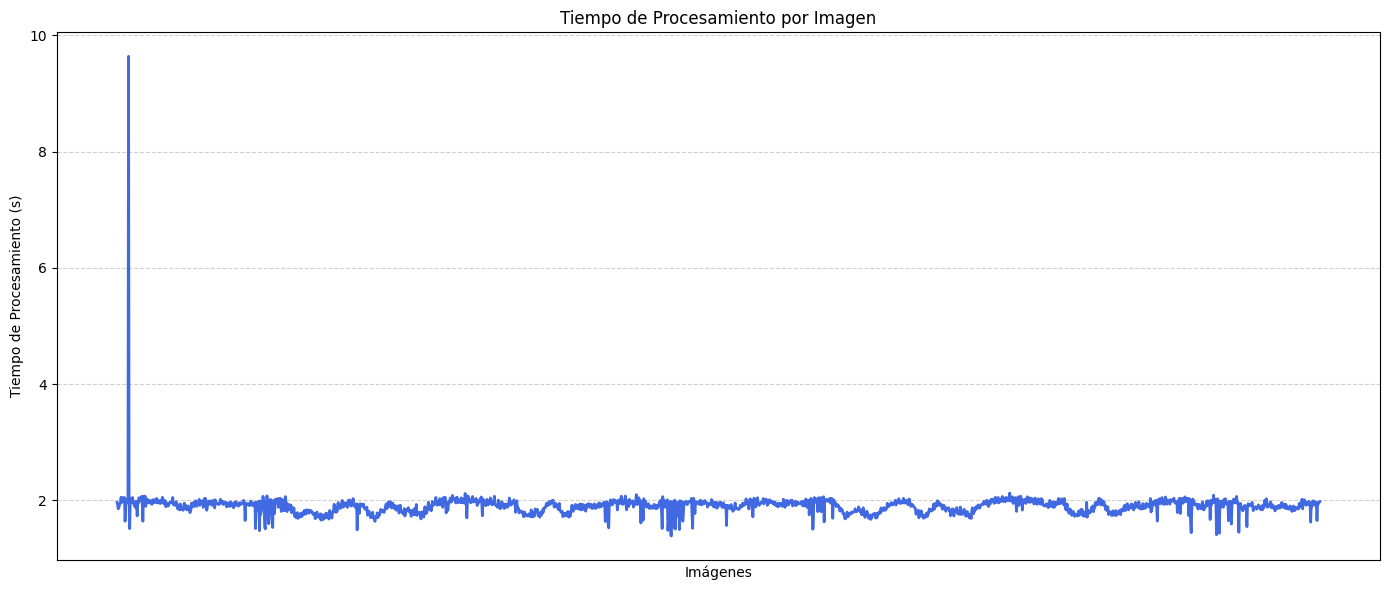

In [ ]:
import matplotlib.pyplot as plt

# üìå Tiempo de procesamiento por imagen (sin ordenar, sin puntos en la l√≠nea)
plt.figure(figsize=(14, 6))
plt.plot(df["Tiempo de Procesamiento"], linestyle="-", color="royalblue", linewidth=2)

# Quitar etiquetas del eje X pero dejar espacio para mantener la estructura visual
plt.xticks([], [])

plt.xlabel("Im√°genes")
plt.ylabel("Tiempo de Procesamiento (s)")
plt.title("Tiempo de Procesamiento por Imagen")

# Mejorar est√©tica del gr√°fico
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


TypeError: 'Axes' object is not subscriptable

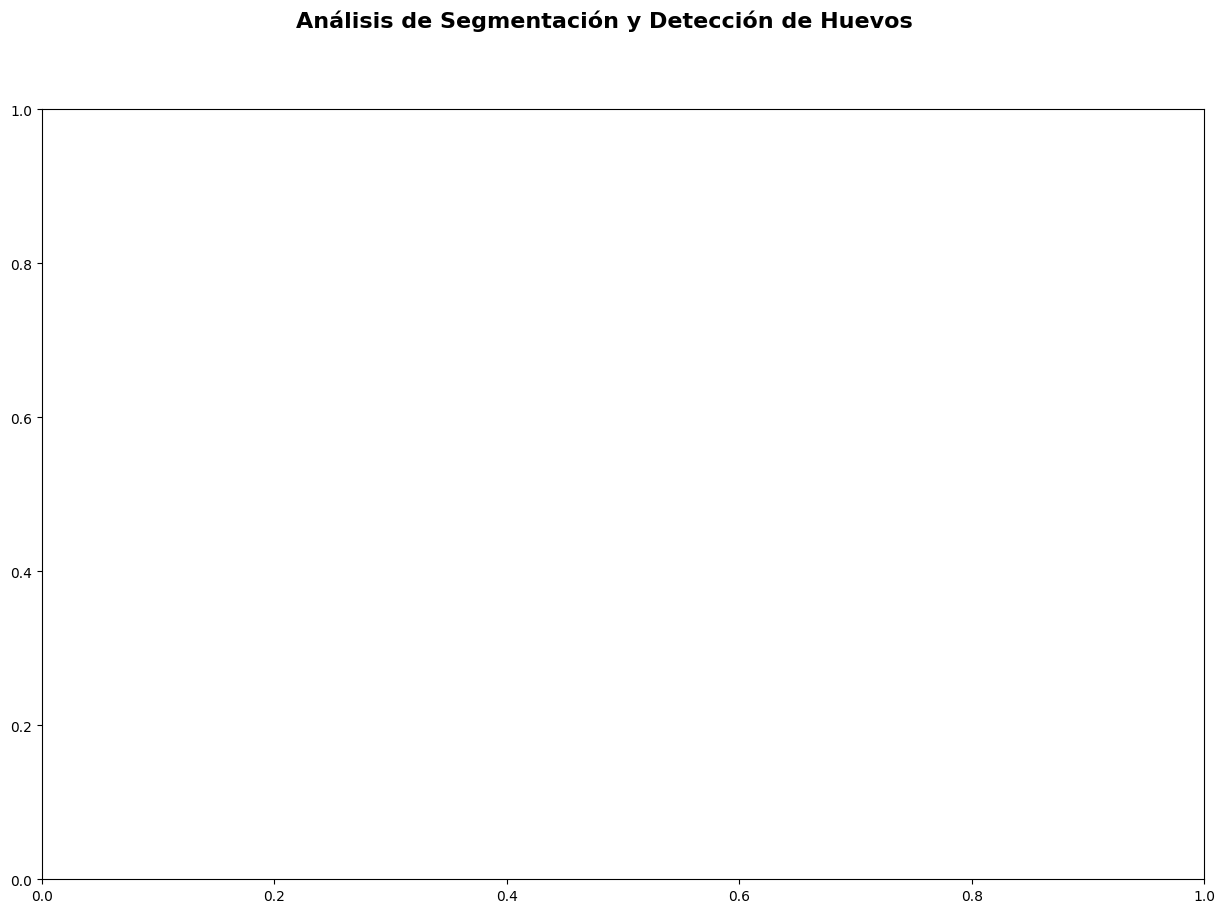

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los subgr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("An√°lisis de Segmentaci√≥n y Detecci√≥n de Huevos", fontsize=16, fontweight='bold')

# üìå 1. Gr√°fico acumulativo de huevos segmentados
axes[0, 0].plot(df.index, df["Huevos Segmentados"].cumsum(), marker="o", color="blue", markersize=2)
axes[0, 0].set_title("Gr√°fico Acumulativo de Huevos Segmentados")
axes[0, 0].set_xlabel("Im√°genes")
axes[0, 0].set_ylabel("Total Acumulado de Huevos Segmentados")
axes[0, 0].grid()

# üìå 2. Tama√±o promedio de los huevos por imagen
axes[0, 1].plot(df.index, df["Ancho Promedio"], label="Ancho Promedio", color="green")
axes[0, 1].plot(df.index, df["Alto Promedio"], label="Alto Promedio", color="orange")
axes[0, 1].set_title("Tama√±o Promedio de los Huevos por Imagen")
axes[0, 1].set_xlabel("Im√°genes")
axes[0, 1].set_ylabel("Tama√±o (pixeles)")
axes[0, 1].legend()
axes[0, 1].grid()

# üìå 3. Gr√°fico de barras de huevos detectados vs. segmentados
axes[1, 0].bar(df.index, df["Huevos Detectados"], alpha=0.6, label="Detectados", color="blue")
axes[1, 0].bar(df.index, df["Huevos Segmentados"], alpha=0.6, label="Segmentados", color="red")
axes[1, 0].set_title("Huevos Detectados vs. Segmentados")
axes[1, 0].set_xlabel("Im√°genes")
axes[1, 0].set_ylabel("Cantidad de Huevos")
axes[1, 0].legend()
axes[1, 0].grid()

# üìå 4. An√°lisis de outliers en tiempos de procesamiento (Scatter Plot)
axes[1, 1].scatter(df.index, df["Tiempo de Procesamiento"], color="purple", alpha=0.6, s=10)
axes[1, 1].set_title("An√°lisis de Outliers en Tiempos de Procesamiento")
axes[1, 1].set_xlabel("Im√°genes")
axes[1, 1].set_ylabel("Tiempo de Procesamiento (s)")
axes[1, 1].grid()

# Ajustar dise√±o y mostrar
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Mostrar la imagen
plt.show()


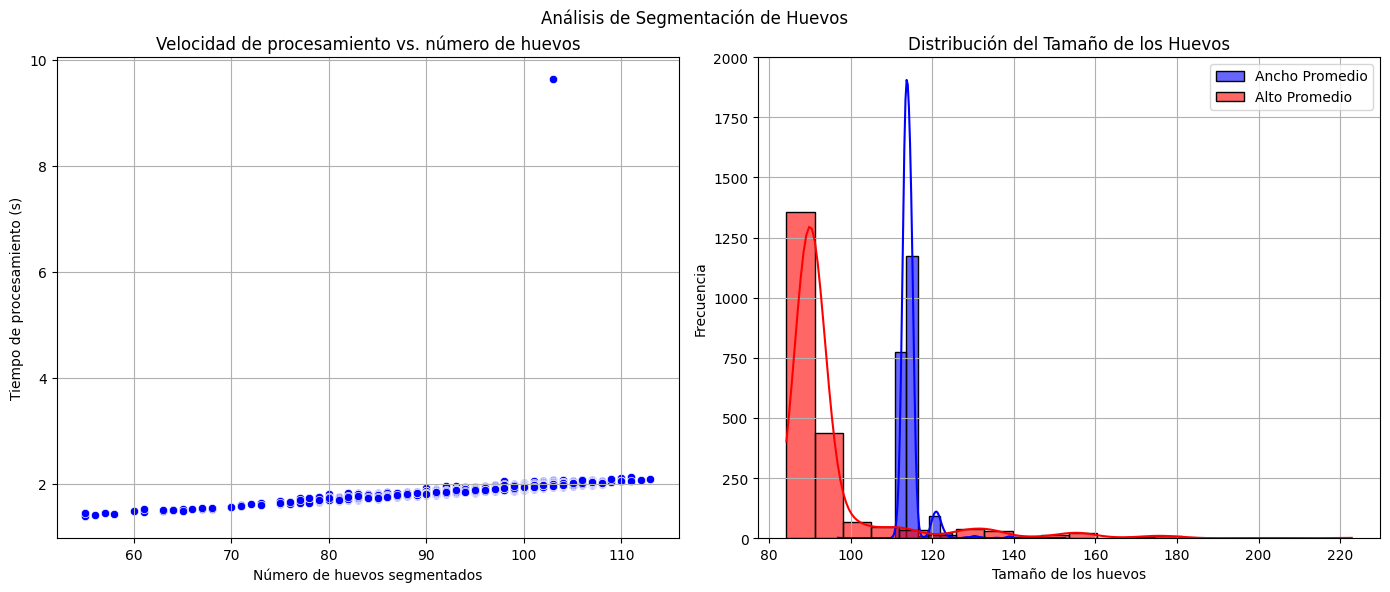

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Crear la figura con dos subgr√°ficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("An√°lisis de Segmentaci√≥n de Huevos")

# üìå 1. Velocidad de procesamiento vs. n√∫mero de huevos (Scatter plot)
sns.scatterplot(x=df["Huevos Segmentados"], y=df["Tiempo de Procesamiento"], ax=axes[0], color="blue")
axes[0].set_xlabel("N√∫mero de huevos segmentados")
axes[0].set_ylabel("Tiempo de procesamiento (s)")
axes[0].set_title("Velocidad de procesamiento vs. n√∫mero de huevos")
axes[0].grid()

# üìå 2. Distribuci√≥n del tama√±o de los huevos (Histograma con KDE)
sns.histplot(df["Ancho Promedio"], bins=20, kde=True, label="Ancho Promedio", color="blue", alpha=0.6, ax=axes[1])
sns.histplot(df["Alto Promedio"], bins=20, kde=True, label="Alto Promedio", color="red", alpha=0.6, ax=axes[1])
axes[1].set_xlabel("Tama√±o de los huevos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Distribuci√≥n del Tama√±o de los Huevos")
axes[1].legend()
axes[1].grid()

# üìå Ajustar dise√±o y mostrar la imagen
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
# Install
!pip install roboflow

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83.0/83.0 kB 3.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.9/49.9 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
from roboflow import Roboflow

# Autenticaci√≥n con Roboflow
rf = Roboflow(api_key="TLhk9VaOvHQQkcd9xD9Y")
workspace = rf.workspace("utmach-gqdfl")
project = workspace.project("eggs-tfm-unir")

# Ruta de im√°genes y etiquetas
images_dir = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/images/"
labels_dir = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/labels/"

# üîπ Subir im√°genes con anotaciones si existen
for img_name in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, img_name.replace(".jpg", ".txt"))  # Ajusta la extensi√≥n si es PNG

    try:
        if os.path.exists(label_path):  # Verifica si la etiqueta existe
            project.upload(image_path=img_path, annotation_path=label_path)
            print(f"‚úÖ Subida {img_name} con anotaciones")
        else:
            project.upload(image_path=img_path)
            print(f"‚ö†Ô∏è Subida {img_name} sin anotaciones (No se encontr√≥ etiqueta)")
    except Exception as e:
        print(f"‚ùå Error al subir {img_name}: {str(e)}")

print("üéâ Proceso de subida finalizado.")

loading Roboflow workspace...
loading Roboflow project...
‚ùå Error al subir eggs_0198.jpg: Image was already annotated.
‚ùå Error al subir eggs_0200.jpg: Image was already annotated.
‚ùå Error al subir eggs_0201.jpg: Image was already annotated.
‚ùå Error al subir eggs_0202.jpg: Image was already annotated.
‚ùå Error al subir eggs_0203.jpg: Image was already annotated.
‚ùå Error al subir eggs_0204.jpg: Image was already annotated.
‚ùå Error al subir eggs_0205.jpg: Image was already annotated.
‚ùå Error al subir eggs_0206.jpg: Image was already annotated.
‚ùå Error al subir eggs_0207.jpg: Image was already annotated.
‚ùå Error al subir eggs_0209.jpg: Image was already annotated.
‚ùå Error al subir eggs_0208.jpg: Image was already annotated.
‚ùå Error al subir eggs_0211.jpg: Image was already annotated.
‚ùå Error al subir eggs_0210.jpg: Image was already annotated.
‚ùå Error al subir eggs_0212.jpg: Image was already annotated.
‚ùå Error al subir eggs_0213.jpg: Image was already annotate

In [ ]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 914.9/914.9 kB 54.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from ultralytics import YOLO

# Verificar la instalaci√≥n y mostrar la versi√≥n
YOLO().info()

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 166MB/s]


YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(319, 2624080, 0, 6.614336)

In [ ]:
!pip install torchviz graphviz

In [ ]:
# Cargar el modelo YOLO11 preentrenado
model = YOLO("yolo11n.pt")  # Puedes elegir entre yolo11n.pt, yolo11s.pt, yolo11m.pt, yolo11l.pt, yolo11x.pt

In [26]:
from ultralytics import YOLO
import pandas as pd

# üìå Obtener detalles de la arquitectura del modelo
model_info = {
    "Par√°metro": [
        "N√∫mero de capas",
        "Par√°metros entrenables",
        "Par√°metros totales",
        "Flops (GFLOPs)",
        "Dimensi√≥n de entrada",
        "N√∫mero de clases",
        "Backbone",
        "Activaci√≥n final"
    ],
    "Valor": [
        len(list(model.model.modules())),  # Contar capas en la arquitectura
        sum(p.numel() for p in model.model.parameters() if p.requires_grad),
        sum(p.numel() for p in model.model.parameters()),
        "No disponible",  # Flops no accesibles en YOLO11
        model.overrides.get("imgsz", "Desconocido"),  # Obtener imgsz
        len(model.names) if hasattr(model, "names") else "Desconocido",
        model.model[0].__class__.__name__ if hasattr(model.model, "__getitem__") else "Desconocido",
        model.model[-1].__class__.__name__ if hasattr(model.model, "__getitem__") else "Desconocido",
    ]
}

# üìå Convertir a DataFrame con formato fila
df_config = pd.DataFrame(model_info)

# üìå Mostrar la tabla en formato de texto plano
print(df_config.to_string(index=False))

# üìå Guardar la tabla en un archivo de texto para copiar y pegar
file_path = "/content/YOLO11_configuracion.txt"
df_config.to_csv(file_path, sep="\t", index=False)

print(f"\nüìÑ La tabla ha sido guardada en: {file_path}")


             Par√°metro         Valor
       N√∫mero de capas           238
Par√°metros entrenables             0
    Par√°metros totales       2582347
        Flops (GFLOPs) No disponible
  Dimensi√≥n de entrada           640
      N√∫mero de clases             1
              Backbone   Desconocido
      Activaci√≥n final   Desconocido

üìÑ La tabla ha sido guardada en: /content/YOLO11_configuracion.txt


In [ ]:
# Entrenar el modelo con tus datos
model.train(data="/content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/data.yaml", epochs=100, imgsz=640, device="cuda")

Ultralytics 8.3.70 üöÄ Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 154MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/labels... 4149 images, 6 backgrounds, 106 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4149/4149 [09:56<00:00,  6.95it/s]

train: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.2916783e323f8325ada81c241a4d0060.jpg: 6 duplicate labels removed
train: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.2973c4c06ca1dc498a29ba2fb27fda8a.jpg: 6 duplicate labels removed
train: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.d9d4e63342947112ab2d769cc3c8265a.jpg: 6 duplicate labels removed
train: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0006_jpg.rf.beae8babbb8d79b92bf008f5e61b01c8.jpg: 2 duplicate labels removed
train: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0006_jpg.rf.e3de27e235f8f0fc5e277e13e0f07872.jpg: 2 duplicate labels rem

train: New cache created: /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/labels... 417 images, 0 backgrounds, 19 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 417/417 [00:52<00:00,  7.94it/s]

val: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0202_jpg.rf.beaf178236a8145cc3753f2a8bf87f02.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0213_jpg.rf.14ad87cc183ffb6531dd31b3fea01569.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0227_jpg.rf.fd5b77dc4b8c75bc1566ca966c1e92fc.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0228_jpg.rf.d38b7f622ee4965db323dfc92675f1df.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0235_jpg.rf.9602108834ed11a3124093317512cced.jpg: 1 duplicate labels removed
val: 

val: New cache created: /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.17G     0.4386      1.007      0.848        586        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.39it/s]

                   all        398      14887      0.963      0.993      0.978      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.64G     0.3464     0.3908     0.8148        654        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.40it/s]

                   all        398      14887      0.975       0.99      0.989      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.41G     0.3454     0.3562     0.8138        733        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.29it/s]

                   all        398      14887      0.972      0.985      0.989      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.08G     0.3311     0.3288     0.8113        707        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.07it/s]


                   all        398      14887      0.977      0.986      0.989      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.54G     0.3217     0.3058     0.8095        458        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.29it/s]

                   all        398      14887      0.974      0.991       0.99       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.22G     0.3127     0.2934      0.809        701        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  1.98it/s]

                   all        398      14887      0.975       0.99      0.991      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.53G     0.3069     0.2838     0.8076        443        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  1.92it/s]

                   all        398      14887      0.969      0.992      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.85G     0.2965     0.2737     0.8064        760        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.08it/s]

                   all        398      14887      0.974      0.991      0.991      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.7G     0.2946     0.2679     0.8053        678        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.16it/s]

                   all        398      14887      0.976       0.99      0.991      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.37G     0.2873      0.259     0.8052        772        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.48it/s]

                   all        398      14887      0.971      0.993      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.64G     0.2788     0.2517     0.8041        660        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.06it/s]

                   all        398      14887      0.973      0.988      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.03G     0.2795     0.2491      0.804        594        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:04<00:00,  2.62it/s]

                   all        398      14887       0.97      0.992      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.64G     0.2749     0.2478     0.8027        687        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.17it/s]

                   all        398      14887      0.976      0.989      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.28G     0.2706     0.2435     0.8032        615        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.08it/s]

                   all        398      14887      0.977      0.986      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.85G     0.2748     0.2435      0.803        729        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.52it/s]

                   all        398      14887      0.976       0.99      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.56G      0.273      0.241     0.8028        634        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:07<00:00,  1.84it/s]

                   all        398      14887      0.972      0.992      0.991      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.73G     0.2677     0.2399     0.8022        587        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.37it/s]

                   all        398      14887      0.977       0.99      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.45G     0.2676     0.2351     0.8026        484        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.37it/s]

                   all        398      14887      0.978      0.989      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.94G     0.2646     0.2318     0.8007        731        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.30it/s]

                   all        398      14887      0.976      0.991      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.37G     0.2667     0.2325     0.8018        595        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.24it/s]

                   all        398      14887      0.978      0.989      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.82G     0.2637      0.229     0.8009        668        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  1.94it/s]

                   all        398      14887      0.977       0.99      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.48G     0.2605     0.2283     0.8004        771        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.00it/s]

                   all        398      14887      0.974      0.992      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.57G     0.2583     0.2307     0.8004        662        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.09it/s]

                   all        398      14887      0.976      0.991      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.63G      0.258     0.2282     0.8011        687        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.34it/s]

                   all        398      14887      0.975       0.99      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.17G     0.2556     0.2197     0.8004        550        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.53it/s]

                   all        398      14887      0.974      0.992      0.992      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.15G     0.2568     0.2201     0.8005        470        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.00it/s]

                   all        398      14887      0.977      0.989      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.59G     0.2529      0.222     0.8006        713        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:04<00:00,  2.75it/s]

                   all        398      14887      0.976       0.99      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.66G      0.256     0.2219      0.801        770        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  2.16it/s]


                   all        398      14887      0.976      0.991      0.992      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.49G     0.2544     0.2225     0.7993        570        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.56it/s]

                   all        398      14887      0.977      0.991      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.21G     0.2517     0.2192      0.799        475        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:07<00:00,  1.82it/s]

                   all        398      14887      0.976      0.991      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.87G     0.2517     0.2163     0.7982        683        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.57it/s]

                   all        398      14887      0.976      0.988      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.27G     0.2503     0.2188     0.7991        620        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:06<00:00,  1.99it/s]

                   all        398      14887      0.975      0.992      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.32G     0.2508     0.2153     0.7985        568        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:04<00:00,  2.66it/s]

                   all        398      14887      0.975      0.989      0.993      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.59G     0.2502     0.2159     0.7985        666        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.18it/s]

                   all        398      14887      0.976       0.99      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.47G     0.2488     0.2166     0.7973        733        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:05<00:00,  2.42it/s]

                   all        398      14887      0.972      0.993      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.73G     0.2453     0.2107     0.7972        555        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 253/253 [02:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|‚ñà‚ñå        | 2/13 [00:01<00:06,  1.69it/s]Exception in thread Thread-38 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
 

KeyboardInterrupt: 

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# üìå Directorio donde YOLO guarda los registros de entrenamiento
log_dir = "runs/detect/train"  # Aseg√∫rate de que este directorio coincida con el de tu entrenamiento

# üìå Cargar los datos de entrenamiento de YOLO
results_csv = os.path.join(log_dir, "results.csv")

# üìå Verificar si el archivo existe
if not os.path.exists(results_csv):
    print(f"‚ö†Ô∏è El archivo {results_csv} no existe. Aseg√∫rate de haber completado el entrenamiento.")
else:
    df = pd.read_csv(results_csv)

In [ ]:
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


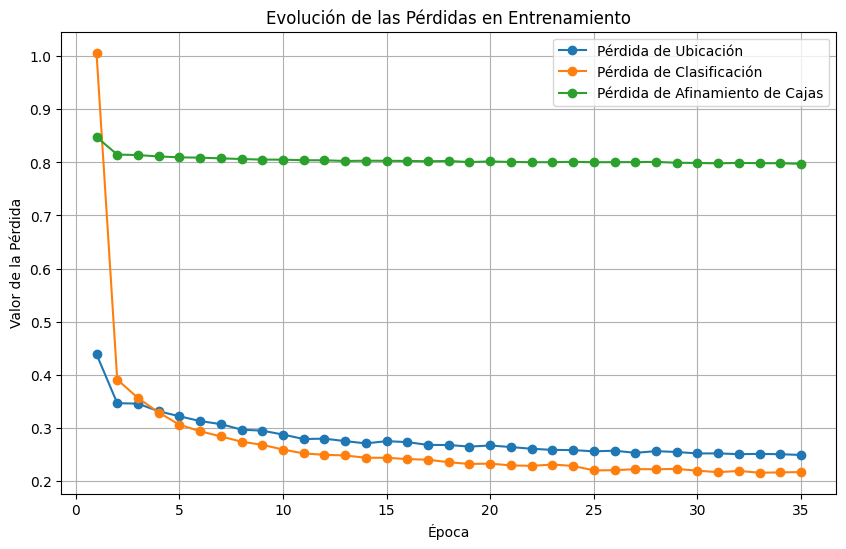

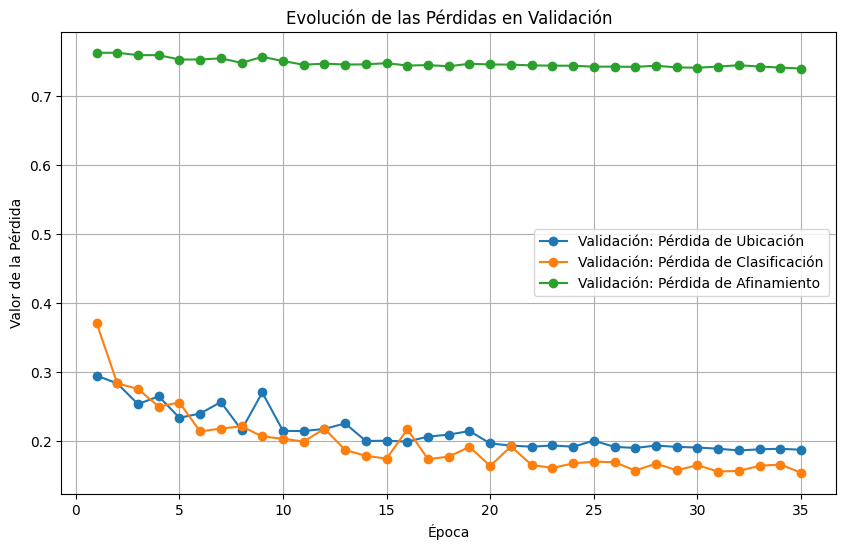

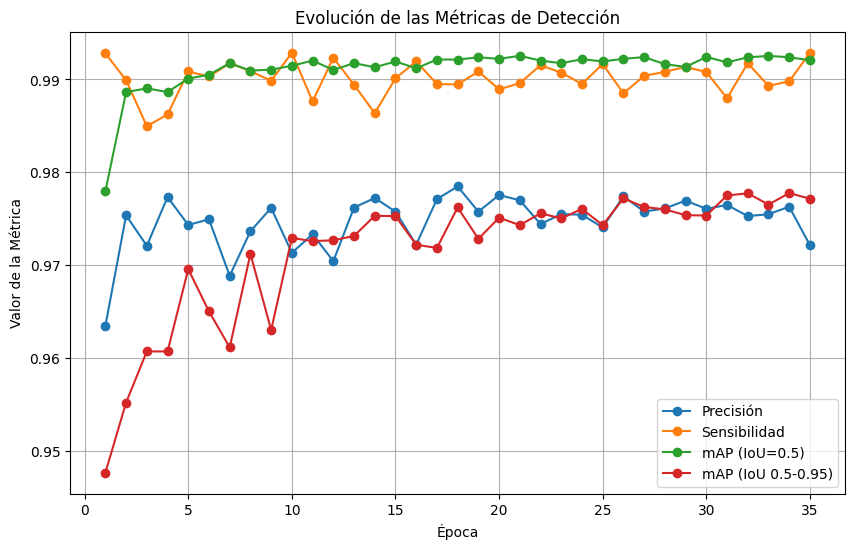

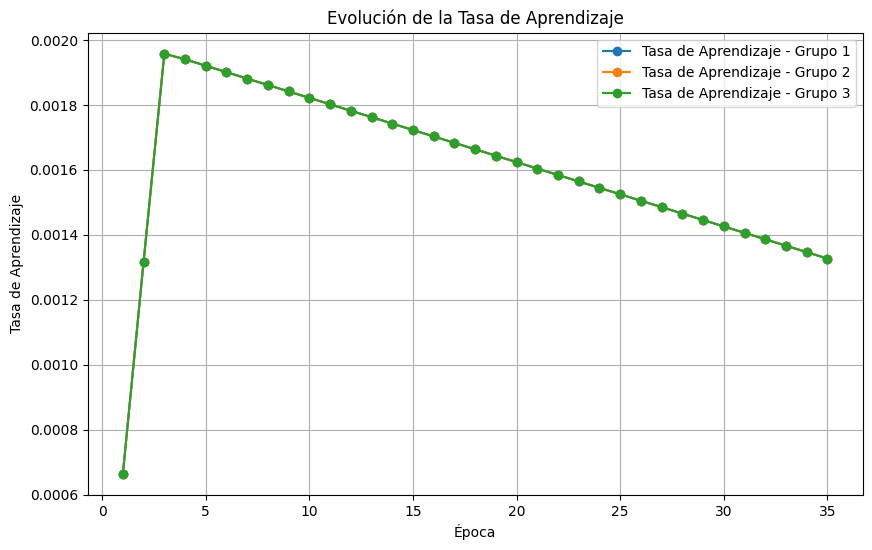

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar los datos desde un archivo CSV
# Aseg√∫rate de que "log_training.csv" est√© en la misma carpeta que tu script o ajusta la ruta.
df = pd.read_csv("/content/runs/detect/train/results.csv")

# 2. Renombrar las columnas para que sean m√°s descriptivas
df = df.rename(columns={
    'train/box_loss': 'P√©rdida de Ubicaci√≥n',
    'train/cls_loss': 'P√©rdida de Clasificaci√≥n',
    'train/dfl_loss': 'P√©rdida de Afinamiento de Cajas',
    'val/box_loss': 'Validaci√≥n: P√©rdida de Ubicaci√≥n',
    'val/cls_loss': 'Validaci√≥n: P√©rdida de Clasificaci√≥n',
    'val/dfl_loss': 'Validaci√≥n: P√©rdida de Afinamiento',
    'metrics/precision(B)': 'Precisi√≥n',
    'metrics/recall(B)': 'Sensibilidad',
    'metrics/mAP50(B)': 'mAP (IoU=0.5)',
    'metrics/mAP50-95(B)': 'mAP (IoU 0.5-0.95)',
    'lr/pg0': 'LR - Grupo 1',
    'lr/pg1': 'LR - Grupo 2',
    'lr/pg2': 'LR - Grupo 3'
})

# 3. Graficar la evoluci√≥n de las p√©rdidas en el entrenamiento

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['P√©rdida de Ubicaci√≥n'], marker='o', label="P√©rdida de Ubicaci√≥n")
plt.plot(df['epoch'], df['P√©rdida de Clasificaci√≥n'], marker='o', label="P√©rdida de Clasificaci√≥n")
plt.plot(df['epoch'], df['P√©rdida de Afinamiento de Cajas'], marker='o', label="P√©rdida de Afinamiento de Cajas")
plt.xlabel("√âpoca")
plt.ylabel("Valor de la P√©rdida")
plt.title("Evoluci√≥n de las P√©rdidas en Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# 4. Graficar la evoluci√≥n de las p√©rdidas en la validaci√≥n

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Validaci√≥n: P√©rdida de Ubicaci√≥n'], marker='o', label="Validaci√≥n: P√©rdida de Ubicaci√≥n")
plt.plot(df['epoch'], df['Validaci√≥n: P√©rdida de Clasificaci√≥n'], marker='o', label="Validaci√≥n: P√©rdida de Clasificaci√≥n")
plt.plot(df['epoch'], df['Validaci√≥n: P√©rdida de Afinamiento'], marker='o', label="Validaci√≥n: P√©rdida de Afinamiento")
plt.xlabel("√âpoca")
plt.ylabel("Valor de la P√©rdida")
plt.title("Evoluci√≥n de las P√©rdidas en Validaci√≥n")
plt.legend()
plt.grid(True)
plt.show()

# 5. Graficar la evoluci√≥n de las m√©tricas de detecci√≥n

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Precisi√≥n'], marker='o', label="Precisi√≥n")
plt.plot(df['epoch'], df['Sensibilidad'], marker='o', label="Sensibilidad")
plt.plot(df['epoch'], df['mAP (IoU=0.5)'], marker='o', label="mAP (IoU=0.5)")
plt.plot(df['epoch'], df['mAP (IoU 0.5-0.95)'], marker='o', label="mAP (IoU 0.5-0.95)")
plt.xlabel("√âpoca")
plt.ylabel("Valor de la M√©trica")
plt.title("Evoluci√≥n de las M√©tricas de Detecci√≥n")
plt.legend()
plt.grid(True)
plt.show()

# 6. Graficar la evoluci√≥n de la tasa de aprendizaje para cada grupo

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['LR - Grupo 1'], marker='o', label="Tasa de Aprendizaje - Grupo 1")
plt.plot(df['epoch'], df['LR - Grupo 2'], marker='o', label="Tasa de Aprendizaje - Grupo 2")
plt.plot(df['epoch'], df['LR - Grupo 3'], marker='o', label="Tasa de Aprendizaje - Grupo 3")
plt.xlabel("√âpoca")
plt.ylabel("Tasa de Aprendizaje")
plt.title("Evoluci√≥n de la Tasa de Aprendizaje")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Cargar el modelo entrenado
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [24]:
import os

# Ruta de la carpeta donde tienes las im√°genes nuevas
image_folder = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_prueba"

# Obtener la lista de im√°genes
image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Aplicar el modelo a cada imagen
results = model(image_files, save=True, conf=0.5)




0: 384x640 106 0s, 1.1ms
1: 384x640 106 0s, 1.1ms
2: 384x640 106 0s, 1.1ms
3: 384x640 106 0s, 1.1ms
4: 384x640 107 0s, 1.1ms
5: 384x640 106 0s, 1.1ms
6: 384x640 106 0s, 1.1ms
7: 384x640 106 0s, 1.1ms
8: 384x640 108 0s, 1.1ms
9: 384x640 106 0s, 1.1ms
10: 384x640 106 0s, 1.1ms
Speed: 2.3ms preprocess, 1.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
